<a href="https://colab.research.google.com/github/Paduspan/CMS/blob/main/CMS_zip_20210622.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Data from Google Drive to Google Colab

In [1]:
import pandas as pd 
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls "/content/drive/My Drive/Data Science"

18zpallagi.csv		  cb_2018_us_zcta510_500k.zip  Prescriber.csv
18zpdoc.docx		  Population.csv	       uszips.csv
cb_2018_us_state_20m.zip  Prescriber_CodeBook.pdf


In [3]:
DataFrame=pd.read_csv("/content/drive/My Drive/Data Science/Prescriber.csv")

### Dataset

In [4]:
DataFrame.head()

,Unnamed: 0,npi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_zip5,nppes_provider_zip4,nppes_provider_state,nppes_provider_country,specialty_description,description_flag,medicare_prvdr_enroll_status,total_claim_count,total_30_day_fill_count,total_drug_cost,total_day_supply,bene_count,ge65_suppress_flag,total_claim_count_ge65,total_30_day_fill_count_ge65,total_drug_cost_ge65,total_day_supply_ge65,bene_count_ge65_suppress_flag,bene_count_ge65,brand_suppress_flag,brand_claim_count,brand_drug_cost,generic_suppress_flag,generic_claim_count,generic_drug_cost,other_suppress_flag,other_claim_count,other_drug_cost,mapd_suppress_flag,mapd_claim_count,mapd_drug_cost,pdp_suppress_flag,...,lis_suppress_flag,lis_claim_count,lis_drug_cost,nonlis_suppress_flag,nonlis_claim_count,nonlis_drug_cost,opioid_claim_count,opioid_drug_cost,opioid_day_supply,opioid_bene_count,opioid_prescriber_rate,la_opioid_claim_count,la_opioid_drug_cost,la_opioid_day_supply,la_opioid_bene_count,la_opioid_prescriber_rate,antibiotic_claim_count,antibiotic_drug_cost,antibiotic_bene_count,antipsych_ge65_suppress_flag,antipsych_claim_count_ge65,antipsych_drug_cost_ge65,antipsych_bene_ge65_suppress_flg,antipsych_bene_count_ge65,average_age_of_beneficiaries,beneficiary_age_less_65_count,beneficiary_age_65_74_count,beneficiary_age_75_84_count,beneficiary_age_greater_84_count,beneficiary_female_count,beneficiary_male_count,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score
0,0,1003000126,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,21502.0,1854.0,MD,US,Internal Medicine,S,E,675,700.3,34683.66,15068,238.0,NaN,517.0,539.9,26897.15,11881.0,NaN,183.0,NaN,124.0,25445.55,NaN,538.0,8972.37,NaN,13.0,265.74,NaN,55.0,3960.66,NaN,...,NaN,351.0,15295.86,NaN,324.0,19387.80,37.0,762.08,291.0,29.0,5.48,NaN,NaN,NaN,NaN,NaN,134.0,8050.71,114.0,*,NaN,NaN,*,NaN,71.0,55.0,84.0,68.0,31.0,134.0,104.0,227.0,NaN,NaN,NaN,0.0,NaN,144.0,94.0,2.0266
1,1,1003000142,M.D.,M,I,4126 N HOLLAND SYLVANIA RD,SUITE 220,TOLEDO,43623.0,3536.0,OH,US,Anesthesiology,S,E,937,973.6,51586.70,27520,146.0,NaN,346.0,363.7,20778.74,10265.0,NaN,61.0,NaN,116.0,31794.97,NaN,821.0,19791.73,NaN,0.0,0.00,NaN,249.0,10542.82,NaN,...,NaN,628.0,33275.89,NaN,309.0,18310.81,425.0,11469.70,11770.0,90.0,45.36,36.0,2534.43,979.0,NaN,8.47,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,61.0,85.0,41.0,NaN,NaN,81.0,65.0,95.0,NaN,0.0,NaN,0.0,NaN,64.0,82.0,1.6538
2,2,1003000159,FNP,F,I,4115 DORCHESTER ROAD,CONCENTRA MEDICAL CENTER,CHARLESTON,29405.0,NaN,SC,US,Nurse Practitioner,S,E,18,18.0,150.02,421,NaN,#,NaN,NaN,NaN,NaN,#,NaN,*,NaN,NaN,#,NaN,NaN,NaN,0.0,0.00,#,NaN,NaN,*,...,*,NaN,NaN,#,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.0,0.00,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1003000167,DDS,M,I,5 PINE CONE RD,NaN,DAYTON,89403.0,7482.0,NV,US,Dentist,T,N,58,58.7,395.17,693,26.0,NaN,37.0,37.7,259.72,571.0,#,NaN,NaN,0.0,0.00,NaN,41.0,261.49,NaN,17.0,133.68,NaN,20.0,103.08,NaN,...,NaN,14.0,78.46,NaN,44.0,316.71,18.0,80.40,39.0,11.0,31.03,0.0,0.00,0.0,0.0,0.00,19.0,114.38,16.0,NaN,0.0,0.0,NaN,0.0,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,1.3362
4,4,1003000282,FNP,F,I,TENNESSEE PRISON FOR WOMEN,3881 STEWARTS LANE,NASHVILLE,37243.0,1.0,TN,US,Nurse Practitioner,S,N,14,14.0,135.93,420,NaN,#,NaN,NaN,NaN,NaN,#,NaN,NaN,0.0,0.00,NaN,14.0,135.93,NaN,0.0,0.00,NaN,0.0,0.00,NaN,...,#,NaN,NaN,*,NaN,NaN,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,NaN,0.0,0.00,0.0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
DataFrame.columns

Index(['Unnamed: 0', 'npi', 'nppes_credentials', 'nppes_provider_gender',
       'nppes_entity_code', 'nppes_provider_street1', 'nppes_provider_street2',
       'nppes_provider_city', 'nppes_provider_zip5', 'nppes_provider_zip4',
       'nppes_provider_state', 'nppes_provider_country',
       'specialty_description', 'description_flag',
       'medicare_prvdr_enroll_status', 'total_claim_count',
       'total_30_day_fill_count', 'total_drug_cost', 'total_day_supply',
       'bene_count', 'ge65_suppress_flag', 'total_claim_count_ge65',
       'total_30_day_fill_count_ge65', 'total_drug_cost_ge65',
       'total_day_supply_ge65', 'bene_count_ge65_suppress_flag',
       'bene_count_ge65', 'brand_suppress_flag', 'brand_claim_count',
       'brand_drug_cost', 'generic_suppress_flag', 'generic_claim_count',
       'generic_drug_cost', 'other_suppress_flag', 'other_claim_count',
       'other_drug_cost', 'mapd_suppress_flag', 'mapd_claim_count',
       'mapd_drug_cost', 'pdp_suppress_flag', '

In [6]:
# #drop Unnamed column
DataFrame.drop(['Unnamed: 0'],axis=1,inplace=True)
columns=DataFrame.columns

In [7]:
#Example before preprocessing
DataFrame.loc[:,'generic_suppress_flag'].head(20)

0     NaN
1     NaN
2       #
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10      #
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16      #
17      #
18    NaN
19    NaN
Name: generic_suppress_flag, dtype: object

### Data Shape before preprocessing

In [8]:
DataFrame.shape

(1014675, 81)

In [9]:
DataFrame.dtypes

npi                                 int64
nppes_credentials                  object
nppes_provider_gender              object
nppes_entity_code                  object
nppes_provider_street1             object
                                   ...   
beneficiary_race_nat_ind_count    float64
beneficiary_race_other_count      float64
beneficiary_nondual_count         float64
beneficiary_dual_count            float64
beneficiary_average_risk_score    float64
Length: 81, dtype: object

In [10]:
DataFrame.isnull().sum().sum()

25878182

In [11]:
x = DataFrame.columns.to_series().groupby(DataFrame.dtypes).groups
print(x)
print('-----------------------------------------------------------------------')
# DataFrame.columns.to_series().groupby(DataFrame.dtypes).sum()
DataFrame_numerical = DataFrame.select_dtypes(exclude='object')
DataFrame_categorical= DataFrame.select_dtypes(include='object')

print('DataFrame_numerical: \n ',DataFrame_numerical.shape,'\n', DataFrame_numerical.columns)
print('-----------------------------------------------------------------------')
print('DataFrame_categorical: \n',DataFrame_categorical.shape,'\n', DataFrame_categorical.columns)

{int64: ['npi', 'total_claim_count', 'total_day_supply'], float64: ['nppes_provider_zip5', 'nppes_provider_zip4', 'total_30_day_fill_count', 'total_drug_cost', 'bene_count', 'total_claim_count_ge65', 'total_30_day_fill_count_ge65', 'total_drug_cost_ge65', 'total_day_supply_ge65', 'bene_count_ge65', 'brand_claim_count', 'brand_drug_cost', 'generic_claim_count', 'generic_drug_cost', 'other_claim_count', 'other_drug_cost', 'mapd_claim_count', 'mapd_drug_cost', 'pdp_claim_count', 'pdp_drug_cost', 'lis_claim_count', 'lis_drug_cost', 'nonlis_claim_count', 'nonlis_drug_cost', 'opioid_claim_count', 'opioid_drug_cost', 'opioid_day_supply', 'opioid_bene_count', 'opioid_prescriber_rate', 'la_opioid_claim_count', 'la_opioid_drug_cost', 'la_opioid_day_supply', 'la_opioid_bene_count', 'la_opioid_prescriber_rate', 'antibiotic_claim_count', 'antibiotic_drug_cost', 'antibiotic_bene_count', 'antipsych_claim_count_ge65', 'antipsych_drug_cost_ge65', 'antipsych_bene_count_ge65', 'average_age_of_beneficiari

In [12]:
DataFrame_numerical.head(3)

,npi,nppes_provider_zip5,nppes_provider_zip4,total_claim_count,total_30_day_fill_count,total_drug_cost,total_day_supply,bene_count,total_claim_count_ge65,total_30_day_fill_count_ge65,total_drug_cost_ge65,total_day_supply_ge65,bene_count_ge65,brand_claim_count,brand_drug_cost,generic_claim_count,generic_drug_cost,other_claim_count,other_drug_cost,mapd_claim_count,mapd_drug_cost,pdp_claim_count,pdp_drug_cost,lis_claim_count,lis_drug_cost,nonlis_claim_count,nonlis_drug_cost,opioid_claim_count,opioid_drug_cost,opioid_day_supply,opioid_bene_count,opioid_prescriber_rate,la_opioid_claim_count,la_opioid_drug_cost,la_opioid_day_supply,la_opioid_bene_count,la_opioid_prescriber_rate,antibiotic_claim_count,antibiotic_drug_cost,antibiotic_bene_count,antipsych_claim_count_ge65,antipsych_drug_cost_ge65,antipsych_bene_count_ge65,average_age_of_beneficiaries,beneficiary_age_less_65_count,beneficiary_age_65_74_count,beneficiary_age_75_84_count,beneficiary_age_greater_84_count,beneficiary_female_count,beneficiary_male_count,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score
0,1003000126,21502.0,1854.0,675,700.3,34683.66,15068,238.0,517.0,539.9,26897.15,11881.0,183.0,124.0,25445.55,538.0,8972.37,13.0,265.74,55.0,3960.66,620.0,30723.00,351.0,15295.86,324.0,19387.80,37.0,762.08,291.0,29.0,5.48,NaN,NaN,NaN,NaN,NaN,134.0,8050.71,114.0,NaN,NaN,NaN,71.0,55.0,84.0,68.0,31.0,134.0,104.0,227.0,NaN,NaN,NaN,0.0,NaN,144.0,94.0,2.0266
1,1003000142,43623.0,3536.0,937,973.6,51586.70,27520,146.0,346.0,363.7,20778.74,10265.0,61.0,116.0,31794.97,821.0,19791.73,0.0,0.00,249.0,10542.82,688.0,41043.88,628.0,33275.89,309.0,18310.81,425.0,11469.70,11770.0,90.0,45.36,36.0,2534.43,979.0,NaN,8.47,NaN,NaN,NaN,0.0,0.0,0.0,61.0,85.0,41.0,NaN,NaN,81.0,65.0,95.0,NaN,0.0,NaN,0.0,NaN,64.0,82.0,1.6538
2,1003000159,29405.0,NaN,18,18.0,150.02,421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.0,0.00,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#Numerical variables
print('Count null \nDataFrame_numerical: \n \n',DataFrame_numerical.isnull().sum())

Count null 
DataFrame_numerical: 
 
 npi                                      0
nppes_provider_zip5                      1
nppes_provider_zip4                 113855
total_claim_count                        0
total_30_day_fill_count                  0
total_drug_cost                          0
total_day_supply                         0
bene_count                          126869
total_claim_count_ge65              220223
total_30_day_fill_count_ge65        220223
total_drug_cost_ge65                220223
total_day_supply_ge65               220223
bene_count_ge65                     447790
brand_claim_count                   446012
brand_drug_cost                     446012
generic_claim_count                 274021
generic_drug_cost                   274021
other_claim_count                   267286
other_drug_cost                     267286
mapd_claim_count                    216580
mapd_drug_cost                      216580
pdp_claim_count                     216580
pdp_drug_cost    

In [14]:
#Categorical variables
print('Count null \nDataFrame_categorical: \n \n',DataFrame_categorical.isnull().sum())

Count null 
DataFrame_categorical: 
 
 nppes_credentials                    41749
nppes_provider_gender                   22
nppes_entity_code                        0
nppes_provider_street1                   0
nppes_provider_street2              603961
nppes_provider_city                      0
nppes_provider_state                     0
nppes_provider_country                   0
specialty_description                    0
description_flag                         0
medicare_prvdr_enroll_status             0
ge65_suppress_flag                  794452
bene_count_ge65_suppress_flag       566885
brand_suppress_flag                 568663
generic_suppress_flag               740654
other_suppress_flag                 747389
mapd_suppress_flag                  798095
pdp_suppress_flag                   798095
lis_suppress_flag                   800266
nonlis_suppress_flag                800266
antipsych_ge65_suppress_flag        882284
antipsych_bene_ge65_suppress_flg    800442
dtype: int64


## K^2 Normality Test
### If an index is normally distributed we use MEAN for handling missing values, else MEDIAN. we use MODE for Object types.

In [15]:
   from scipy.stats import normaltest
j=0
for i in DataFrame_numerical:
  j+=1
  # print(j)
# The D'Agostino's K^2 Normality Test

  # G=[]
  # NG=[]
  stat, p = normaltest(DataFrame_numerical.iloc[:, j-1])
  # print('stat=%.3f, p=%.3f' % (stat, p))
  if p > 0.05:
      # print(i)
      print('Gaussian:',[j, i])
  
  else:
      # print(i)
      print('Not Gaussian:', [j, i])

Not Gaussian: [1, 'npi']
Not Gaussian: [2, 'nppes_provider_zip5']
Not Gaussian: [3, 'nppes_provider_zip4']
Not Gaussian: [4, 'total_claim_count']
Not Gaussian: [5, 'total_30_day_fill_count']
Not Gaussian: [6, 'total_drug_cost']
Not Gaussian: [7, 'total_day_supply']
Not Gaussian: [8, 'bene_count']
Not Gaussian: [9, 'total_claim_count_ge65']
Not Gaussian: [10, 'total_30_day_fill_count_ge65']
Not Gaussian: [11, 'total_drug_cost_ge65']
Not Gaussian: [12, 'total_day_supply_ge65']
Not Gaussian: [13, 'bene_count_ge65']
Not Gaussian: [14, 'brand_claim_count']
Not Gaussian: [15, 'brand_drug_cost']
Not Gaussian: [16, 'generic_claim_count']
Not Gaussian: [17, 'generic_drug_cost']
Not Gaussian: [18, 'other_claim_count']
Not Gaussian: [19, 'other_drug_cost']
Not Gaussian: [20, 'mapd_claim_count']
Not Gaussian: [21, 'mapd_drug_cost']
Not Gaussian: [22, 'pdp_claim_count']
Not Gaussian: [23, 'pdp_drug_cost']
Not Gaussian: [24, 'lis_claim_count']
Not Gaussian: [25, 'lis_drug_cost']
Not Gaussian: [26, '

### Estimate Mean and Median at "nppes_provider_zip5", as an example

In [16]:
print(' "nppes_provider_zip5" \nMean:  ',DataFrame_numerical.iloc[:, 1].mean())
print('Median:  ',DataFrame_numerical.iloc[:, 1].median())
# print('Mode:  ',DataFrame_numerical.iloc[:, 1].mode())

 "nppes_provider_zip5" 
Mean:   48079.889316174456
Median:   45154.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


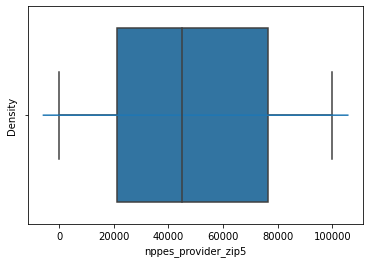

In [17]:
import seaborn as sns
# Box plot
sns.boxplot(DataFrame_numerical.iloc[:, 1])
# Distribution plot
sns.distplot(DataFrame_numerical.iloc[:, 1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


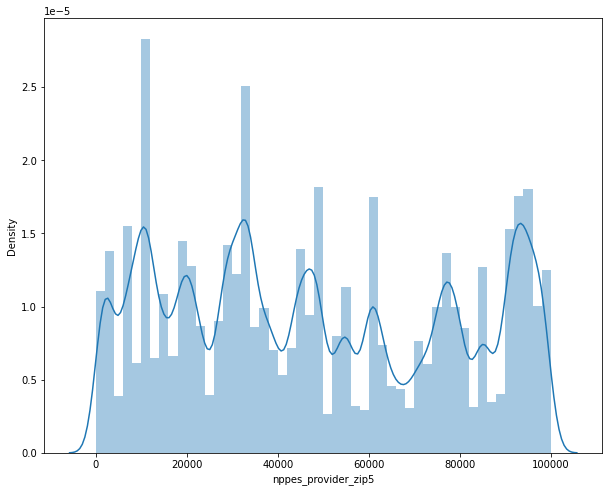

In [18]:
import matplotlib.pyplot as plt
fig, ax= plt.subplots(figsize=(10,8))
sns.distplot(DataFrame_numerical.iloc[:, 1])

### Estimate Mean and Median at "total_drug_cost", as an example

In [19]:
print(' "total_drug_cost" \nMean:  ',DataFrame_numerical.iloc[:, 5].mean())
print('Median:  ',DataFrame_numerical.iloc[:, 5].median())
# print('Mode:  ',DataFrame_numerical.iloc[:, 5].mode())

 "total_drug_cost" 
Mean:   114807.66353309363
Median:   9881.13


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


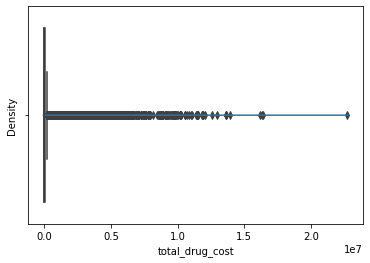

In [20]:
import seaborn as sns
# Box plot
sns.boxplot(DataFrame_numerical.iloc[:, 5])
# Distribution plot
sns.distplot(DataFrame_numerical.iloc[:, 5])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


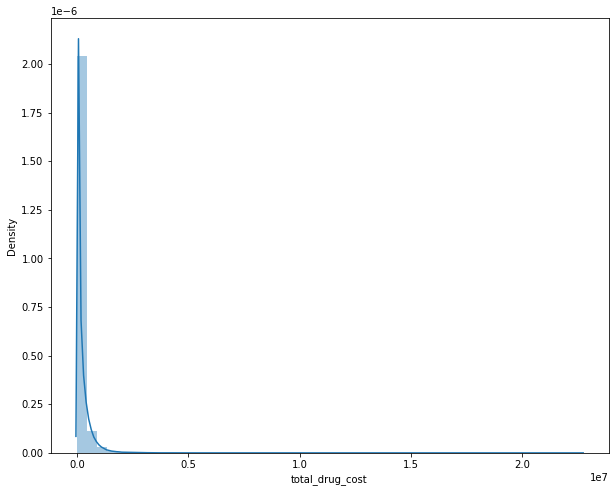

In [21]:
import matplotlib.pyplot as plt
fig, ax= plt.subplots(figsize=(10,8))
sns.distplot(DataFrame_numerical.iloc[:, 5])

### Replacing Median and Mode for missing values

In [22]:
import numpy as np 
DataFrame.replace([' ','?', '#', '*'], np.nan, inplace=True)

#Function takes in the name of dataset.

def errorReplacer(data):
    df = data
    x = pd.DataFrame(df.isnull().sum())
    x = x[x[0] > 0]

    for i in x.index:
        if df[i].dtypes == 'float64':
            median = df[i].median()
            df[i].replace(np.nan, median, inplace = True)
            if df[i].dtypes == 'int64':
                df[i] = df[i].astype(int)
            elif df[i].dtypes == 'float64':
                pass
        elif df[i].dtypes == 'object':
            mode = df[i].mode()
            df[i] = df[i].replace({np.nan : mode.values})


errorReplacer(DataFrame)
print(DataFrame.head())


          npi  ... beneficiary_average_risk_score
0  1003000126  ...                         2.0266
1  1003000142  ...                         1.6538
2  1003000159  ...                         1.2276
3  1003000167  ...                         1.3362
4  1003000282  ...                         1.2276

[5 rows x 81 columns]


### Remained Null values

In [23]:
DataFrame.isnull().sum().sum()

11161425

In [24]:
DataFrame.head(3)

,npi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_zip5,nppes_provider_zip4,nppes_provider_state,nppes_provider_country,specialty_description,description_flag,medicare_prvdr_enroll_status,total_claim_count,total_30_day_fill_count,total_drug_cost,total_day_supply,bene_count,ge65_suppress_flag,total_claim_count_ge65,total_30_day_fill_count_ge65,total_drug_cost_ge65,total_day_supply_ge65,bene_count_ge65_suppress_flag,bene_count_ge65,brand_suppress_flag,brand_claim_count,brand_drug_cost,generic_suppress_flag,generic_claim_count,generic_drug_cost,other_suppress_flag,other_claim_count,other_drug_cost,mapd_suppress_flag,mapd_claim_count,mapd_drug_cost,pdp_suppress_flag,pdp_claim_count,...,lis_suppress_flag,lis_claim_count,lis_drug_cost,nonlis_suppress_flag,nonlis_claim_count,nonlis_drug_cost,opioid_claim_count,opioid_drug_cost,opioid_day_supply,opioid_bene_count,opioid_prescriber_rate,la_opioid_claim_count,la_opioid_drug_cost,la_opioid_day_supply,la_opioid_bene_count,la_opioid_prescriber_rate,antibiotic_claim_count,antibiotic_drug_cost,antibiotic_bene_count,antipsych_ge65_suppress_flag,antipsych_claim_count_ge65,antipsych_drug_cost_ge65,antipsych_bene_ge65_suppress_flg,antipsych_bene_count_ge65,average_age_of_beneficiaries,beneficiary_age_less_65_count,beneficiary_age_65_74_count,beneficiary_age_75_84_count,beneficiary_age_greater_84_count,beneficiary_female_count,beneficiary_male_count,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score
0,1003000126,M.D.,M,I,900 SETON DR,SUITE 100,CUMBERLAND,21502.0,1854.0,MD,US,Internal Medicine,S,E,675,700.3,34683.66,15068,238.0,NaN,517.0,539.9,26897.150,11881.0,NaN,183.0,NaN,124.0,25445.55,NaN,538.0,8972.370,NaN,13.0,265.74,NaN,55.0,3960.66,NaN,620.0,...,NaN,351.0,15295.86,NaN,324.0,19387.800,37.0,762.08,291.0,29.0,5.48,0.0,0.00,0.0,0.0,0.00,134.0,8050.71,114.0,NaN,0.0,0.0,NaN,0.0,71.0,55.0,84.0,68.0,31.0,134.0,104.0,227.0,0.0,0.0,0.0,0.0,0.0,144.0,94.0,2.0266
1,1003000142,M.D.,M,I,4126 N HOLLAND SYLVANIA RD,SUITE 220,TOLEDO,43623.0,3536.0,OH,US,Anesthesiology,S,E,937,973.6,51586.70,27520,146.0,NaN,346.0,363.7,20778.740,10265.0,NaN,61.0,NaN,116.0,31794.97,NaN,821.0,19791.730,NaN,0.0,0.00,NaN,249.0,10542.82,NaN,688.0,...,NaN,628.0,33275.89,NaN,309.0,18310.810,425.0,11469.70,11770.0,90.0,45.36,36.0,2534.43,979.0,0.0,8.47,33.0,480.12,27.0,NaN,0.0,0.0,NaN,0.0,61.0,85.0,41.0,66.0,25.0,81.0,65.0,95.0,0.0,0.0,0.0,0.0,0.0,64.0,82.0,1.6538
2,1003000159,FNP,F,I,4115 DORCHESTER ROAD,CONCENTRA MEDICAL CENTER,CHARLESTON,29405.0,3333.0,SC,US,Nurse Practitioner,S,E,18,18.0,150.02,421,82.0,NaN,230.0,278.8,13305.705,6367.0,NaN,102.0,NaN,71.0,17913.89,NaN,316.0,7949.895,NaN,0.0,0.00,NaN,89.0,4578.96,NaN,208.0,...,NaN,126.0,7813.95,NaN,165.0,8520.975,24.0,269.56,185.0,18.0,4.07,0.0,0.00,0.0,0.0,0.00,33.0,480.12,27.0,NaN,0.0,0.0,NaN,0.0,70.0,31.0,73.0,66.0,25.0,73.0,46.0,110.0,0.0,0.0,0.0,0.0,0.0,85.0,40.0,1.2276


In [25]:
##Example after preprocessing
DataFrame.loc[:,'generic_suppress_flag'].head(20)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
Name: generic_suppress_flag, dtype: float64

### Identifying Columns contain NAN

In [26]:
NAN=DataFrame.columns[DataFrame.isna().any()].tolist()
print(NAN)

['ge65_suppress_flag', 'bene_count_ge65_suppress_flag', 'brand_suppress_flag', 'generic_suppress_flag', 'other_suppress_flag', 'mapd_suppress_flag', 'pdp_suppress_flag', 'lis_suppress_flag', 'nonlis_suppress_flag', 'antipsych_ge65_suppress_flag', 'antipsych_bene_ge65_suppress_flg']


In [27]:
DataFrame.head(3)

,npi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_zip5,nppes_provider_zip4,nppes_provider_state,nppes_provider_country,specialty_description,description_flag,medicare_prvdr_enroll_status,total_claim_count,total_30_day_fill_count,total_drug_cost,total_day_supply,bene_count,ge65_suppress_flag,total_claim_count_ge65,total_30_day_fill_count_ge65,total_drug_cost_ge65,total_day_supply_ge65,bene_count_ge65_suppress_flag,bene_count_ge65,brand_suppress_flag,brand_claim_count,brand_drug_cost,generic_suppress_flag,generic_claim_count,generic_drug_cost,other_suppress_flag,other_claim_count,other_drug_cost,mapd_suppress_flag,mapd_claim_count,mapd_drug_cost,pdp_suppress_flag,pdp_claim_count,...,lis_suppress_flag,lis_claim_count,lis_drug_cost,nonlis_suppress_flag,nonlis_claim_count,nonlis_drug_cost,opioid_claim_count,opioid_drug_cost,opioid_day_supply,opioid_bene_count,opioid_prescriber_rate,la_opioid_claim_count,la_opioid_drug_cost,la_opioid_day_supply,la_opioid_bene_count,la_opioid_prescriber_rate,antibiotic_claim_count,antibiotic_drug_cost,antibiotic_bene_count,antipsych_ge65_suppress_flag,antipsych_claim_count_ge65,antipsych_drug_cost_ge65,antipsych_bene_ge65_suppress_flg,antipsych_bene_count_ge65,average_age_of_beneficiaries,beneficiary_age_less_65_count,beneficiary_age_65_74_count,beneficiary_age_75_84_count,beneficiary_age_greater_84_count,beneficiary_female_count,beneficiary_male_count,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score
0,1003000126,M.D.,M,I,900 SETON DR,SUITE 100,CUMBERLAND,21502.0,1854.0,MD,US,Internal Medicine,S,E,675,700.3,34683.66,15068,238.0,NaN,517.0,539.9,26897.150,11881.0,NaN,183.0,NaN,124.0,25445.55,NaN,538.0,8972.370,NaN,13.0,265.74,NaN,55.0,3960.66,NaN,620.0,...,NaN,351.0,15295.86,NaN,324.0,19387.800,37.0,762.08,291.0,29.0,5.48,0.0,0.00,0.0,0.0,0.00,134.0,8050.71,114.0,NaN,0.0,0.0,NaN,0.0,71.0,55.0,84.0,68.0,31.0,134.0,104.0,227.0,0.0,0.0,0.0,0.0,0.0,144.0,94.0,2.0266
1,1003000142,M.D.,M,I,4126 N HOLLAND SYLVANIA RD,SUITE 220,TOLEDO,43623.0,3536.0,OH,US,Anesthesiology,S,E,937,973.6,51586.70,27520,146.0,NaN,346.0,363.7,20778.740,10265.0,NaN,61.0,NaN,116.0,31794.97,NaN,821.0,19791.730,NaN,0.0,0.00,NaN,249.0,10542.82,NaN,688.0,...,NaN,628.0,33275.89,NaN,309.0,18310.810,425.0,11469.70,11770.0,90.0,45.36,36.0,2534.43,979.0,0.0,8.47,33.0,480.12,27.0,NaN,0.0,0.0,NaN,0.0,61.0,85.0,41.0,66.0,25.0,81.0,65.0,95.0,0.0,0.0,0.0,0.0,0.0,64.0,82.0,1.6538
2,1003000159,FNP,F,I,4115 DORCHESTER ROAD,CONCENTRA MEDICAL CENTER,CHARLESTON,29405.0,3333.0,SC,US,Nurse Practitioner,S,E,18,18.0,150.02,421,82.0,NaN,230.0,278.8,13305.705,6367.0,NaN,102.0,NaN,71.0,17913.89,NaN,316.0,7949.895,NaN,0.0,0.00,NaN,89.0,4578.96,NaN,208.0,...,NaN,126.0,7813.95,NaN,165.0,8520.975,24.0,269.56,185.0,18.0,4.07,0.0,0.00,0.0,0.0,0.00,33.0,480.12,27.0,NaN,0.0,0.0,NaN,0.0,70.0,31.0,73.0,66.0,25.0,73.0,46.0,110.0,0.0,0.0,0.0,0.0,0.0,85.0,40.0,1.2276


In [28]:
#drop columns which have NAN in all rows
DataFrame.drop(NAN,axis=1,inplace=True)
columns=DataFrame.columns

### Pure Dataset

In [29]:
DataFrame.head(3)

,npi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_zip5,nppes_provider_zip4,nppes_provider_state,nppes_provider_country,specialty_description,description_flag,medicare_prvdr_enroll_status,total_claim_count,total_30_day_fill_count,total_drug_cost,total_day_supply,bene_count,total_claim_count_ge65,total_30_day_fill_count_ge65,total_drug_cost_ge65,total_day_supply_ge65,bene_count_ge65,brand_claim_count,brand_drug_cost,generic_claim_count,generic_drug_cost,other_claim_count,other_drug_cost,mapd_claim_count,mapd_drug_cost,pdp_claim_count,pdp_drug_cost,lis_claim_count,lis_drug_cost,nonlis_claim_count,nonlis_drug_cost,opioid_claim_count,opioid_drug_cost,opioid_day_supply,opioid_bene_count,opioid_prescriber_rate,la_opioid_claim_count,la_opioid_drug_cost,la_opioid_day_supply,la_opioid_bene_count,la_opioid_prescriber_rate,antibiotic_claim_count,antibiotic_drug_cost,antibiotic_bene_count,antipsych_claim_count_ge65,antipsych_drug_cost_ge65,antipsych_bene_count_ge65,average_age_of_beneficiaries,beneficiary_age_less_65_count,beneficiary_age_65_74_count,beneficiary_age_75_84_count,beneficiary_age_greater_84_count,beneficiary_female_count,beneficiary_male_count,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score
0,1003000126,M.D.,M,I,900 SETON DR,SUITE 100,CUMBERLAND,21502.0,1854.0,MD,US,Internal Medicine,S,E,675,700.3,34683.66,15068,238.0,517.0,539.9,26897.150,11881.0,183.0,124.0,25445.55,538.0,8972.370,13.0,265.74,55.0,3960.66,620.0,30723.00,351.0,15295.86,324.0,19387.800,37.0,762.08,291.0,29.0,5.48,0.0,0.00,0.0,0.0,0.00,134.0,8050.71,114.0,0.0,0.0,0.0,71.0,55.0,84.0,68.0,31.0,134.0,104.0,227.0,0.0,0.0,0.0,0.0,0.0,144.0,94.0,2.0266
1,1003000142,M.D.,M,I,4126 N HOLLAND SYLVANIA RD,SUITE 220,TOLEDO,43623.0,3536.0,OH,US,Anesthesiology,S,E,937,973.6,51586.70,27520,146.0,346.0,363.7,20778.740,10265.0,61.0,116.0,31794.97,821.0,19791.730,0.0,0.00,249.0,10542.82,688.0,41043.88,628.0,33275.89,309.0,18310.810,425.0,11469.70,11770.0,90.0,45.36,36.0,2534.43,979.0,0.0,8.47,33.0,480.12,27.0,0.0,0.0,0.0,61.0,85.0,41.0,66.0,25.0,81.0,65.0,95.0,0.0,0.0,0.0,0.0,0.0,64.0,82.0,1.6538
2,1003000159,FNP,F,I,4115 DORCHESTER ROAD,CONCENTRA MEDICAL CENTER,CHARLESTON,29405.0,3333.0,SC,US,Nurse Practitioner,S,E,18,18.0,150.02,421,82.0,230.0,278.8,13305.705,6367.0,102.0,71.0,17913.89,316.0,7949.895,0.0,0.00,89.0,4578.96,208.0,12637.93,126.0,7813.95,165.0,8520.975,24.0,269.56,185.0,18.0,4.07,0.0,0.00,0.0,0.0,0.00,33.0,480.12,27.0,0.0,0.0,0.0,70.0,31.0,73.0,66.0,25.0,73.0,46.0,110.0,0.0,0.0,0.0,0.0,0.0,85.0,40.0,1.2276


In [30]:
DataFrame.shape

(1014675, 70)

### Reform DataFrame_numerical and DataFrame_categorical [after eliminating columns that all were NAN]

In [31]:
z = DataFrame.columns.to_series().groupby(DataFrame.dtypes).groups
print(z)
print('-----------------------------------------------------------------------')
# DataFrame.columns.to_series().groupby(DataFrame.dtypes).sum()
DataFrame_numerical = DataFrame.select_dtypes(exclude='object')
DataFrame_categorical= DataFrame.select_dtypes(include='object')

print('DataFrame_numerical: \n ',DataFrame_numerical.shape,'\n', DataFrame_numerical.columns)
print('-----------------------------------------------------------------------')
print('DataFrame_categorical: \n',DataFrame_categorical.shape,'\n', DataFrame_categorical.columns)

{int64: ['npi', 'total_claim_count', 'total_day_supply'], float64: ['nppes_provider_zip5', 'nppes_provider_zip4', 'total_30_day_fill_count', 'total_drug_cost', 'bene_count', 'total_claim_count_ge65', 'total_30_day_fill_count_ge65', 'total_drug_cost_ge65', 'total_day_supply_ge65', 'bene_count_ge65', 'brand_claim_count', 'brand_drug_cost', 'generic_claim_count', 'generic_drug_cost', 'other_claim_count', 'other_drug_cost', 'mapd_claim_count', 'mapd_drug_cost', 'pdp_claim_count', 'pdp_drug_cost', 'lis_claim_count', 'lis_drug_cost', 'nonlis_claim_count', 'nonlis_drug_cost', 'opioid_claim_count', 'opioid_drug_cost', 'opioid_day_supply', 'opioid_bene_count', 'opioid_prescriber_rate', 'la_opioid_claim_count', 'la_opioid_drug_cost', 'la_opioid_day_supply', 'la_opioid_bene_count', 'la_opioid_prescriber_rate', 'antibiotic_claim_count', 'antibiotic_drug_cost', 'antibiotic_bene_count', 'antipsych_claim_count_ge65', 'antipsych_drug_cost_ge65', 'antipsych_bene_count_ge65', 'average_age_of_beneficiari

In [32]:
DataFrame.isnull().sum().sum()

0

In [33]:
DataFrame.max()

npi                                    1992999866
nppes_credentials                 ZACHARY REICHER
nppes_provider_gender                           M
nppes_entity_code                               O
nppes_provider_street1                    ZRB 739
                                       ...       
beneficiary_race_nat_ind_count                358
beneficiary_race_other_count                  774
beneficiary_nondual_count                   23568
beneficiary_dual_count                      10681
beneficiary_average_risk_score            10.3912
Length: 70, dtype: object

In [34]:
DataFrame.min()

npi                                       1003000126
nppes_credentials                              (DDS)
nppes_provider_gender                              F
nppes_entity_code                                  I
nppes_provider_street1            # 1 BURDICK EXPY W
                                         ...        
beneficiary_race_nat_ind_count                     0
beneficiary_race_other_count                       0
beneficiary_nondual_count                          0
beneficiary_dual_count                             0
beneficiary_average_risk_score                0.2989
Length: 70, dtype: object

In [35]:
DataFrame.describe()

,npi,nppes_provider_zip5,nppes_provider_zip4,total_claim_count,total_30_day_fill_count,total_drug_cost,total_day_supply,bene_count,total_claim_count_ge65,total_30_day_fill_count_ge65,total_drug_cost_ge65,total_day_supply_ge65,bene_count_ge65,brand_claim_count,brand_drug_cost,generic_claim_count,generic_drug_cost,other_claim_count,other_drug_cost,mapd_claim_count,mapd_drug_cost,pdp_claim_count,pdp_drug_cost,lis_claim_count,lis_drug_cost,nonlis_claim_count,nonlis_drug_cost,opioid_claim_count,opioid_drug_cost,opioid_day_supply,opioid_bene_count,opioid_prescriber_rate,la_opioid_claim_count,la_opioid_drug_cost,la_opioid_day_supply,la_opioid_bene_count,la_opioid_prescriber_rate,antibiotic_claim_count,antibiotic_drug_cost,antibiotic_bene_count,antipsych_claim_count_ge65,antipsych_drug_cost_ge65,antipsych_bene_count_ge65,average_age_of_beneficiaries,beneficiary_age_less_65_count,beneficiary_age_65_74_count,beneficiary_age_75_84_count,beneficiary_age_greater_84_count,beneficiary_female_count,beneficiary_male_count,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score
count,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06,1.014675e+06
mean,1.499846e+09,4.807989e+04,3.724659e+03,1.347907e+03,1.928596e+03,1.148077e+05,5.338034e+04,1.419844e+02,1.071794e+03,1.595121e+03,7.984384e+04,4.414422e+04,1.356715e+02,2.836143e+02,7.832199e+04,1.112070e+03,2.848598e+04,1.025313e+01,3.571989e+02,4.774174e+02,3.535614e+04,9.124698e+02,8.121695e+04,6.365325e+02,5.841879e+04,7.584194e+02,5.873747e+04,8.330086e+01,3.902359e+03,1.721660e+03,2.880897e+01,9.727873e+00,9.462469e+00,1.860483e+03,2.653976e+02,1.501963e+00,2.232601e+00,5.994085e+01,1.770165e+03,3.989357e+01,9.432037e+00,1.337531e+03,1.010203e+00,6.902157e+01,3.987892e+01,8.543471e+01,7.232366e+01,2.905907e+01,9.908355e+01,6.591450e+01,1.363556e+02,8.944361e+00,1.918183e+00,8.617915e+00,1.710883e-01,2.532722e-01,1.170668e+02,5.446033e+01,1.360579e+00
std,2.879233e+08,3.029933e+04,2.120459e+03,3.218246e+03,4.463711e+03,2.970736e+05,1.250020e+05,1.834417e+02,2.620618e+03,3.794333e+03,1.973353e+05,1.066790e+05,1.485124e+02,7.354392e+02,2.264247e+05,2.479750e+03,6.042660e+04,3.975132e+01,1.581803e+03,1.398180e+03,1.098002e+05,2.300617e+03,2.198183e+05,2.002397e+03,1.926714e+05,1.739674e+03,1.521389e+05,2.650627e+02,2.833261e+04,7.141847e+03,4.621373e+01,1.538691e+01,6.745667e+01,1.640843e+04,1.941530e+03,1.245025e+01,7.615466e+00,1.007640e+02,6.714438e+03,4.925827e+01,5.950090e+01,1.096003e+04,7.533239e+00,5.929920e+00,3.951460e+01,7.370498e+01,4.417661e+01,2.346562e+01,1.033811e+02,7.577784e+01,1.314470e+02,3.593214e+01,2.333729e+01,5.079777e+01,3.530689e+00,2.994223e+00,1.318495e+02,6.509357e+01,5.863979e-01
min,1.003000e+09,0.000000e+00,0.000000e+00,1.100000e+01,1.100000e+01,0.000000e+00,1.100000e+01,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00000

### Outliers

In [36]:
#drop 'npi' for visualizing Dataset
# #'npi' is something like serial number
# print(DataFrame_numerical)
DataFrame_numerical.drop(['npi'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


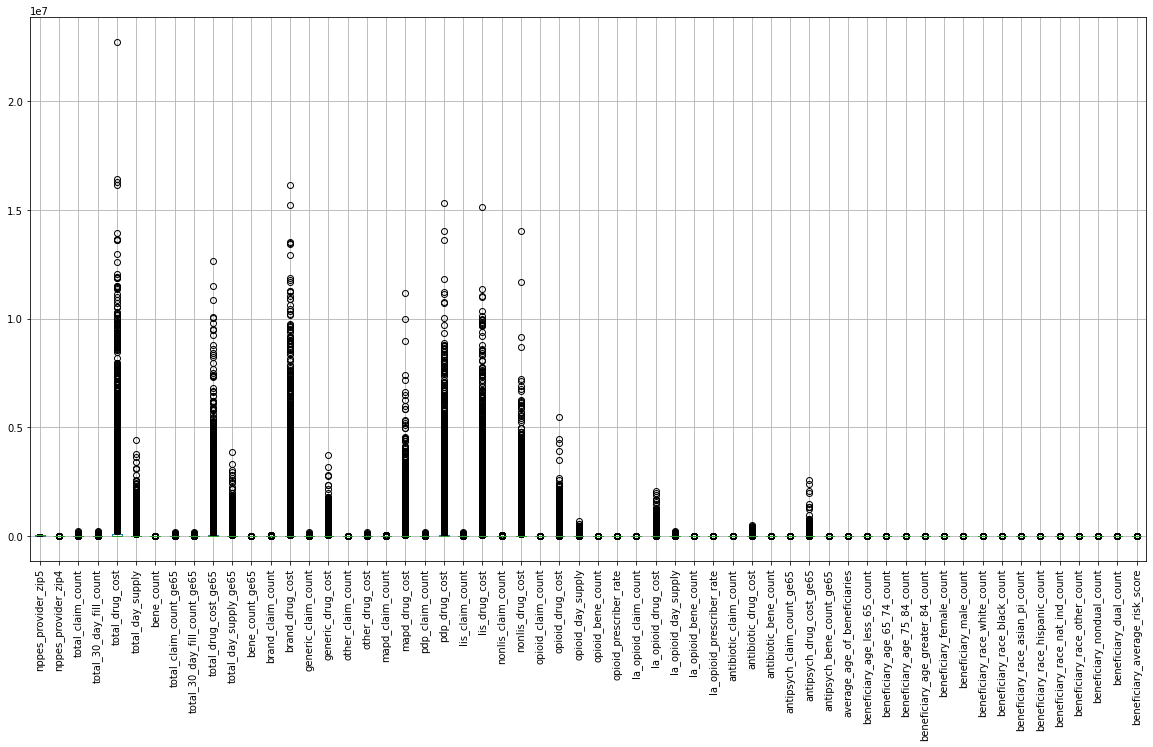

In [37]:
DataFrame_numerical.boxplot(figsize=(20,10), rot=90)

# Tukey (Detecting and Removing Outliers)
### The distribution’s inner fence is defined as 1.5 x IQR below Q1, and 1.5 x IQR above Q3. The outer fence is defined as 3 x IQR below Q1, and 3 x IQR above Q3. Following Tukey, only the probable outliers are treated, which lie outside the outer fence.

In [38]:
# First Way *

# from scipy import stats
# import numpy as np
# #Tukey's method
# def tukeys_method(DataFrame, variable):
#     #Takes two parameters: dataframe & variable of interest as string
#     q1 = DataFrame[variable].quantile(0.25)
#     q3 = DataFrame[variable].quantile(0.75)
#     iqr = q3-q1
#     inner_fence = 1.5*iqr
#     outer_fence = 3*iqr
    
#     #inner fence lower and upper end
#     inner_fence_le = q1-inner_fence
#     inner_fence_ue = q3+inner_fence
    
#     #outer fence lower and upper end
#     outer_fence_le = q1-outer_fence
#     outer_fence_ue = q3+outer_fence
    
#     outliers_prob = []
#     outliers_poss = []
#     for index, x in enumerate(DataFrame[variable]):
#         if x <= outer_fence_le or x >= outer_fence_ue:
#             outliers_prob.append(index)
#     for index, x in enumerate(DataFrame[variable]):
#         if x <= inner_fence_le or x >= inner_fence_ue:
#             outliers_poss.append(index)
#     return outliers_prob, outliers_poss

# for i in DataFrame.columns:
#     probable_outliers_tm, possible_outliers_tm = tukeys_method(DataFrame, i)
#     print(probable_outliers_tm)

In [39]:
# Second Way **

import pandas as pd
import numpy as np

def drop_outliers(DataFrame_numerical, field_name):
    distance = 1.5 * (np.nanpercentile(DataFrame_numerical[field_name], 97) - np.nanpercentile(DataFrame_numerical[field_name], 3))
    DataFrame_numerical.drop(DataFrame_numerical[DataFrame_numerical[field_name] > distance + np.nanpercentile(DataFrame_numerical[field_name], 97)].index, inplace=True)
    DataFrame_numerical.drop(DataFrame_numerical[DataFrame_numerical[field_name] < np.nanpercentile(DataFrame_numerical[field_name], 3) - distance].index, inplace=True)

if __name__ == "__main__":
      # assuming DataFrame_numerical exists and contains numeric variables

    before=DataFrame_numerical.shape

    for column in DataFrame_numerical.columns:
        drop_outliers(DataFrame_numerical, column)

    after=DataFrame_numerical.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

In [40]:
print('DataFrame_numerical.shape before removing outliers :', before,
      '\nDataFrame_numerical.shape after removing outliers :',after,
      '\nAmount of Removed rows :', before[0]-after[0])

DataFrame_numerical.shape before removing outliers : (1014675, 58) 
DataFrame_numerical.shape after removing outliers : (840526, 58) 
Amount of Removed rows : 174149


In [41]:
DataFrame_categorical.shape   ##PROBLEM!!! DataFarame_numerical must be merged with DataFrame in the following lines

(1014675, 11)

In [42]:
DataFrame_numerical.head(3)

,nppes_provider_zip5,nppes_provider_zip4,total_claim_count,total_30_day_fill_count,total_drug_cost,total_day_supply,bene_count,total_claim_count_ge65,total_30_day_fill_count_ge65,total_drug_cost_ge65,total_day_supply_ge65,bene_count_ge65,brand_claim_count,brand_drug_cost,generic_claim_count,generic_drug_cost,other_claim_count,other_drug_cost,mapd_claim_count,mapd_drug_cost,pdp_claim_count,pdp_drug_cost,lis_claim_count,lis_drug_cost,nonlis_claim_count,nonlis_drug_cost,opioid_claim_count,opioid_drug_cost,opioid_day_supply,opioid_bene_count,opioid_prescriber_rate,la_opioid_claim_count,la_opioid_drug_cost,la_opioid_day_supply,la_opioid_bene_count,la_opioid_prescriber_rate,antibiotic_claim_count,antibiotic_drug_cost,antibiotic_bene_count,antipsych_claim_count_ge65,antipsych_drug_cost_ge65,antipsych_bene_count_ge65,average_age_of_beneficiaries,beneficiary_age_less_65_count,beneficiary_age_65_74_count,beneficiary_age_75_84_count,beneficiary_age_greater_84_count,beneficiary_female_count,beneficiary_male_count,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score
0,21502.0,1854.0,675,700.3,34683.66,15068,238.0,517.0,539.9,26897.150,11881.0,183.0,124.0,25445.55,538.0,8972.370,13.0,265.74,55.0,3960.66,620.0,30723.00,351.0,15295.86,324.0,19387.800,37.0,762.08,291.0,29.0,5.48,0.0,0.00,0.0,0.0,0.00,134.0,8050.71,114.0,0.0,0.0,0.0,71.0,55.0,84.0,68.0,31.0,134.0,104.0,227.0,0.0,0.0,0.0,0.0,0.0,144.0,94.0,2.0266
1,43623.0,3536.0,937,973.6,51586.70,27520,146.0,346.0,363.7,20778.740,10265.0,61.0,116.0,31794.97,821.0,19791.730,0.0,0.00,249.0,10542.82,688.0,41043.88,628.0,33275.89,309.0,18310.810,425.0,11469.70,11770.0,90.0,45.36,36.0,2534.43,979.0,0.0,8.47,33.0,480.12,27.0,0.0,0.0,0.0,61.0,85.0,41.0,66.0,25.0,81.0,65.0,95.0,0.0,0.0,0.0,0.0,0.0,64.0,82.0,1.6538
2,29405.0,3333.0,18,18.0,150.02,421,82.0,230.0,278.8,13305.705,6367.0,102.0,71.0,17913.89,316.0,7949.895,0.0,0.00,89.0,4578.96,208.0,12637.93,126.0,7813.95,165.0,8520.975,24.0,269.56,185.0,18.0,4.07,0.0,0.00,0.0,0.0,0.00,33.0,480.12,27.0,0.0,0.0,0.0,70.0,31.0,73.0,66.0,25.0,73.0,46.0,110.0,0.0,0.0,0.0,0.0,0.0,85.0,40.0,1.2276


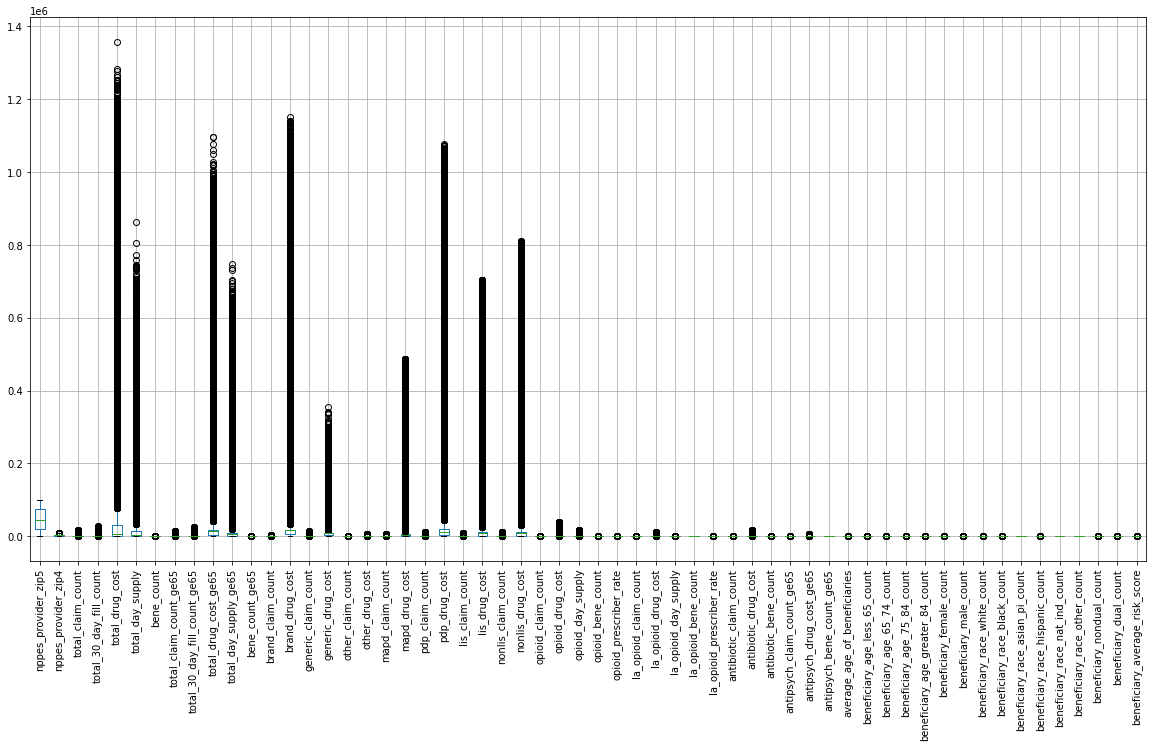

In [43]:
DataFrame_numerical.boxplot(figsize=(20,10), rot=90)

In [44]:
DataFrame.shape

(1014675, 70)

In [45]:
DataFrame.head(3)

,npi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_zip5,nppes_provider_zip4,nppes_provider_state,nppes_provider_country,specialty_description,description_flag,medicare_prvdr_enroll_status,total_claim_count,total_30_day_fill_count,total_drug_cost,total_day_supply,bene_count,total_claim_count_ge65,total_30_day_fill_count_ge65,total_drug_cost_ge65,total_day_supply_ge65,bene_count_ge65,brand_claim_count,brand_drug_cost,generic_claim_count,generic_drug_cost,other_claim_count,other_drug_cost,mapd_claim_count,mapd_drug_cost,pdp_claim_count,pdp_drug_cost,lis_claim_count,lis_drug_cost,nonlis_claim_count,nonlis_drug_cost,opioid_claim_count,opioid_drug_cost,opioid_day_supply,opioid_bene_count,opioid_prescriber_rate,la_opioid_claim_count,la_opioid_drug_cost,la_opioid_day_supply,la_opioid_bene_count,la_opioid_prescriber_rate,antibiotic_claim_count,antibiotic_drug_cost,antibiotic_bene_count,antipsych_claim_count_ge65,antipsych_drug_cost_ge65,antipsych_bene_count_ge65,average_age_of_beneficiaries,beneficiary_age_less_65_count,beneficiary_age_65_74_count,beneficiary_age_75_84_count,beneficiary_age_greater_84_count,beneficiary_female_count,beneficiary_male_count,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score
0,1003000126,M.D.,M,I,900 SETON DR,SUITE 100,CUMBERLAND,21502.0,1854.0,MD,US,Internal Medicine,S,E,675,700.3,34683.66,15068,238.0,517.0,539.9,26897.150,11881.0,183.0,124.0,25445.55,538.0,8972.370,13.0,265.74,55.0,3960.66,620.0,30723.00,351.0,15295.86,324.0,19387.800,37.0,762.08,291.0,29.0,5.48,0.0,0.00,0.0,0.0,0.00,134.0,8050.71,114.0,0.0,0.0,0.0,71.0,55.0,84.0,68.0,31.0,134.0,104.0,227.0,0.0,0.0,0.0,0.0,0.0,144.0,94.0,2.0266
1,1003000142,M.D.,M,I,4126 N HOLLAND SYLVANIA RD,SUITE 220,TOLEDO,43623.0,3536.0,OH,US,Anesthesiology,S,E,937,973.6,51586.70,27520,146.0,346.0,363.7,20778.740,10265.0,61.0,116.0,31794.97,821.0,19791.730,0.0,0.00,249.0,10542.82,688.0,41043.88,628.0,33275.89,309.0,18310.810,425.0,11469.70,11770.0,90.0,45.36,36.0,2534.43,979.0,0.0,8.47,33.0,480.12,27.0,0.0,0.0,0.0,61.0,85.0,41.0,66.0,25.0,81.0,65.0,95.0,0.0,0.0,0.0,0.0,0.0,64.0,82.0,1.6538
2,1003000159,FNP,F,I,4115 DORCHESTER ROAD,CONCENTRA MEDICAL CENTER,CHARLESTON,29405.0,3333.0,SC,US,Nurse Practitioner,S,E,18,18.0,150.02,421,82.0,230.0,278.8,13305.705,6367.0,102.0,71.0,17913.89,316.0,7949.895,0.0,0.00,89.0,4578.96,208.0,12637.93,126.0,7813.95,165.0,8520.975,24.0,269.56,185.0,18.0,4.07,0.0,0.00,0.0,0.0,0.00,33.0,480.12,27.0,0.0,0.0,0.0,70.0,31.0,73.0,66.0,25.0,73.0,46.0,110.0,0.0,0.0,0.0,0.0,0.0,85.0,40.0,1.2276


In [46]:
DataFrame = pd.merge(DataFrame_numerical, DataFrame) # reforming DataFrame after removing Outliers

In [47]:
DataFrame.shape

(840526, 70)

In [48]:
DataFrame.head(3)

,nppes_provider_zip5,nppes_provider_zip4,total_claim_count,total_30_day_fill_count,total_drug_cost,total_day_supply,bene_count,total_claim_count_ge65,total_30_day_fill_count_ge65,total_drug_cost_ge65,total_day_supply_ge65,bene_count_ge65,brand_claim_count,brand_drug_cost,generic_claim_count,generic_drug_cost,other_claim_count,other_drug_cost,mapd_claim_count,mapd_drug_cost,pdp_claim_count,pdp_drug_cost,lis_claim_count,lis_drug_cost,nonlis_claim_count,nonlis_drug_cost,opioid_claim_count,opioid_drug_cost,opioid_day_supply,opioid_bene_count,opioid_prescriber_rate,la_opioid_claim_count,la_opioid_drug_cost,la_opioid_day_supply,la_opioid_bene_count,la_opioid_prescriber_rate,antibiotic_claim_count,antibiotic_drug_cost,antibiotic_bene_count,antipsych_claim_count_ge65,antipsych_drug_cost_ge65,antipsych_bene_count_ge65,average_age_of_beneficiaries,beneficiary_age_less_65_count,beneficiary_age_65_74_count,beneficiary_age_75_84_count,beneficiary_age_greater_84_count,beneficiary_female_count,beneficiary_male_count,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score,npi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_state,nppes_provider_country,specialty_description,description_flag,medicare_prvdr_enroll_status
0,21502.0,1854.0,675,700.3,34683.66,15068,238.0,517.0,539.9,26897.150,11881.0,183.0,124.0,25445.55,538.0,8972.370,13.0,265.74,55.0,3960.66,620.0,30723.00,351.0,15295.86,324.0,19387.800,37.0,762.08,291.0,29.0,5.48,0.0,0.00,0.0,0.0,0.00,134.0,8050.71,114.0,0.0,0.0,0.0,71.0,55.0,84.0,68.0,31.0,134.0,104.0,227.0,0.0,0.0,0.0,0.0,0.0,144.0,94.0,2.0266,1003000126,M.D.,M,I,900 SETON DR,SUITE 100,CUMBERLAND,MD,US,Internal Medicine,S,E
1,43623.0,3536.0,937,973.6,51586.70,27520,146.0,346.0,363.7,20778.740,10265.0,61.0,116.0,31794.97,821.0,19791.730,0.0,0.00,249.0,10542.82,688.0,41043.88,628.0,33275.89,309.0,18310.810,425.0,11469.70,11770.0,90.0,45.36,36.0,2534.43,979.0,0.0,8.47,33.0,480.12,27.0,0.0,0.0,0.0,61.0,85.0,41.0,66.0,25.0,81.0,65.0,95.0,0.0,0.0,0.0,0.0,0.0,64.0,82.0,1.6538,1003000142,M.D.,M,I,4126 N HOLLAND SYLVANIA RD,SUITE 220,TOLEDO,OH,US,Anesthesiology,S,E
2,29405.0,3333.0,18,18.0,150.02,421,82.0,230.0,278.8,13305.705,6367.0,102.0,71.0,17913.89,316.0,7949.895,0.0,0.00,89.0,4578.96,208.0,12637.93,126.0,7813.95,165.0,8520.975,24.0,269.56,185.0,18.0,4.07,0.0,0.00,0.0,0.0,0.00,33.0,480.12,27.0,0.0,0.0,0.0,70.0,31.0,73.0,66.0,25.0,73.0,46.0,110.0,0.0,0.0,0.0,0.0,0.0,85.0,40.0,1.2276,1003000159,FNP,F,I,4115 DORCHESTER ROAD,CONCENTRA MEDICAL CENTER,CHARLESTON,SC,US,Nurse Practitioner,S,E


### Find out how many are Individuals and how many are Organizations

In [49]:
DataFrame[['nppes_entity_code','npi']].groupby(['nppes_entity_code']).count()

,npi
nppes_entity_code,
I,840504
O,22


### Find out maedicare providers specialty_description

In [50]:
DataFrame[['specialty_description', 'npi']].groupby(['specialty_description']).count()

,npi
specialty_description,
Acupuncturist,105
Addiction Medicine,110
Adult Companion,4
Advanced Practice Dental Therapist,1
Allergy/Immunology,3522
...,...
Unknown Supplier/Provider,16
Urology,7827
Vascular Surgery,2527


### Find out how many maedicare providers are male and how many of them are female

In [51]:
DataFrame[['nppes_provider_gender', 'npi']].groupby(['nppes_provider_gender']).count()

,npi
nppes_provider_gender,
F,336710
M,503816


### how many services in US and outside US

In [52]:
df_us=DataFrame[(DataFrame['nppes_provider_country']=='US')]
df_non_us=DataFrame[~(DataFrame['nppes_provider_country']=='US')]

In [53]:
print ('Number of Services offered in US - ',df_us['npi'].count())
print ('Number of Services offered outside US - ',df_non_us['npi'].count())

Number of Services offered in US -  840526
Number of Services offered outside US -  0


### check the count of credentials

In [54]:
DataFrame['nppes_credentials'].value_counts()

M.D.               258512
MD                 209540
DDS                 50437
D.D.S.              31563
PA-C                30093
                    ...  
MD RETIRED              1
M.D.FACP                1
AHCNS-BC                1
OB/GYN.                 1
LAUREN BUCHHEIM         1
Name: nppes_credentials, Length: 4848, dtype: int64

In [55]:
(DataFrame[(DataFrame['nppes_provider_state']=='NC')])[['nppes_provider_city','nppes_provider_zip5','npi']].groupby(by=['nppes_provider_city','nppes_provider_zip5']).count()

,,npi
nppes_provider_city,nppes_provider_zip5,
ABERDEEN,28315.0,9
ADVANCE,27006.0,25
AHOSKIE,27910.0,37
ALAMANCE,27201.0,1
ALBEMARLE,28001.0,78
...,...,...
WOODLAND,27897.0,1
YADKINVILLE,27055.0,22
YANCEYVILLE,27379.0,14


In [56]:
(DataFrame[(DataFrame['nppes_provider_state']=='NC')])[['nppes_provider_city','nppes_provider_zip5','specialty_description','npi']].groupby(by=['nppes_provider_city','nppes_provider_zip5','specialty_description']).count()

npi
nppes_provider_city nppes_provider_zip5 specialty_description     
ABERDEEN            28315.0             Dentist                  4
                                        General Practice         1
                                        Nurse Practitioner       1
                                        Ophthalmology            1
                                        Optometry                2
...                                                            ...
ZEBULON             27597.0             General Practice         2
                                        Internal Medicine        1
                                        Nurse Practitioner       1
                                        Optometry                1
                                        Physician Assistant      1

[5245 rows x 1 columns]

In [57]:
# where zipcode is 27614
(DataFrame[(DataFrame['nppes_provider_state']=='NC')
                    &(DataFrame['nppes_provider_zip5'] ==27614)])[['nppes_provider_city',
                                                                                      'nppes_provider_zip5',
                                                                                      'specialty_description',
                                                                                      'npi']
                                                                                    ].groupby(by=['nppes_provider_city',
                                                                                                  'nppes_provider_zip5',
                                                                                                  'specialty_description']).count()

npi
nppes_provider_city nppes_provider_zip5 specialty_description                  
RALEIGH             27614.0             Allergy/Immunology                    2
                                        Dentist                               9
                                        Dermatology                           3
                                        Emergency Medicine                    4
                                        Endocrinology                         1
                                        Family Practice                      10
                                        Internal Medicine                     7
                                        Neuropsychiatry                       1
                                        Nurse Practitioner                    3
                                        Obstetrics/Gynecology                12
                                        Optometry                             3
                                        Oral & Maxillofacial Surgery          1
                                        Oral Surgery (dentists only)          1
                                        Orthopedic Surgery                    1
                                        Otolaryngology                        2
                                        Pediatric Medicine                    1
                                        Pharmacist                            1
                                        Physician Assistant                  13
                                        Plastic and Reconstructive Surgery    1
                                        Podiatry                              1
                                        Radiation Oncology                    1
                                        Specialist                            3
                                        Vascular Surgery                      2

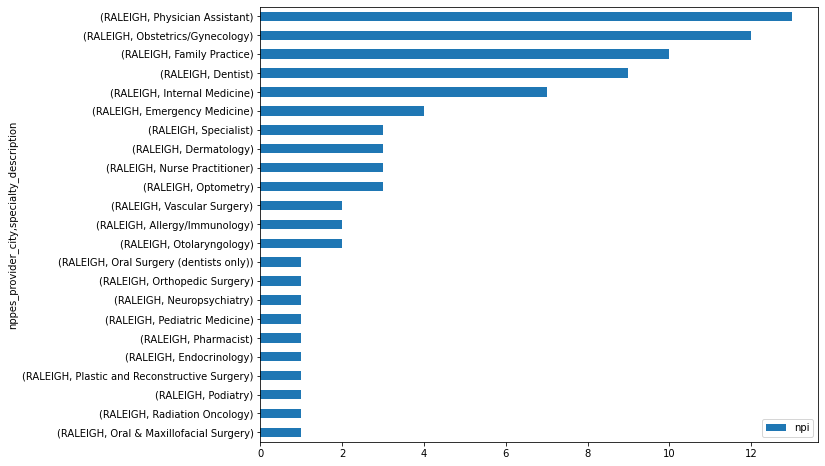

In [58]:
(DataFrame[(DataFrame['nppes_provider_state']=='NC')
                    &(DataFrame['nppes_provider_zip5'] ==27614)])[['nppes_provider_city',
                                                                                      'specialty_description',
                                                                                      'npi']
                                                                                    ].groupby(by=['nppes_provider_city',
                                                                                                  'specialty_description']).count().sort_values(by='npi', ascending=True).plot(kind='barh', figsize=(10,8))

## Adding Income column from the other dataset based on the Zipcodes

In [59]:
zpallagi=pd.read_csv("/content/drive/My Drive/Data Science/18zpallagi.csv")
zpallagi.head()

,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,ELF,CPREP,PREP,DIR_DEP,N2,NUMDEP,TOTAL_VITA,VITA,TCE,VITA_EIC,RAC,ELDERLY,A00100,N02650,A02650,N00200,A00200,N00300,A00300,N00600,A00600,N00650,A00650,N00700,A00700,N00900,A00900,N01000,A01000,N01750,A01750,SCHF,...,N07225,A07225,N07260,A07260,N09400,A09400,N85770,A85770,N85775,A85775,N09750,A09750,N10600,A10600,N59660,A59660,N59720,A59720,N11070,A11070,N10960,A10960,N11560,A11560,N06500,A06500,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11900,A11900,N11902,A11902,N12000,A12000
0,1,AL,0,1,768120.0,466830.0,90960.0,198750.0,696930.0,37470.0,399160.0,559820.0,1180240.0,439980.0,24700.0,16610.0,8100.0,5300.0,193550.0,146430.0,10119915.0,768120.0,10261015.0,611200.0,8093820.0,90050.0,58326.0,38280.0,64851.0,34310.0,42808.0,7120.0,3777.0,139800.0,722620.0,31400.0,41473.0,113700.0,1189581.0,7000.0,...,72640.0,25221709.0,470.0,442.0,109110.0,151679.0,49840.0,445567.0,52070.0,457574.0,8020.0,4656.0,705730.0,1956009.0,335090.0,1029252.0,309520.0,925357.0,206770.0,327356.0,46740.0,42649.0,19410.0,12495.0,192210.0,112117.0,298790.0,272245.0,0.0,0.0,0.0,0.0,59030.0,50007.0,669420.0,1732176.0,666750.0,1725286.0,2730.0,4220.0
1,1,AL,0,2,503430.0,225110.0,130060.0,134320.0,457510.0,23180.0,266880.0,371440.0,977450.0,348420.0,12230.0,8350.0,3880.0,350.0,124380.0,112920.0,18156451.0,503430.0,18322144.0,432240.0,14986384.0,91220.0,69033.0,37860.0,90397.0,34020.0,62140.0,35400.0,20927.0,68680.0,265689.0,30540.0,82058.0,110070.0,2117606.0,8690.0,...,183090.0,219324614.0,5260.0,7424.0,39300.0,92618.0,28510.0,243637.0,29770.0,258173.0,16630.0,11567.0,490520.0,1960001.0,143650.0,316107.0,129100.0,280354.0,128110.0,252063.0,28980.0,25862.0,6210.0,6244.0,351410.0,725087.0,376800.0,834109.0,0.0,0.0,0.0,0.0,77300.0,111047.0,424280.0,1230668.0,420960.0,1220934.0,4110.0,9399.0
2,1,AL,0,3,274590.0,95560.0,131770.0,41020.0,248630.0,13210.0,157800.0,179490.0,587740.0,182370.0,3110.0,1590.0,1520.0,0.0,45970.0,80580.0,16867358.0,274590.0,17015570.0,233850.0,12992584.0,84410.0,71942.0,38560.0,126299.0,34850.0,88256.0,49180.0,34350.0,43620.0,275245.0,32070.0,131901.0,82600.0,2245803.0,8180.0,...,102150.0,231949913.0,3210.0,7166.0,27890.0,73743.0,4730.0,43137.0,7240.0,64380.0,4060.0,4340.0,270000.0,1599388.0,530.0,209.0,190.0,77.0,25960.0,43983.0,15140.0,13663.0,170.0,228.0,245890.0,1091252.0,253380.0,1178827.0,0.0,0.0,0.0,0.0,68920.0,148870.0,205830.0,562490.0,201770.0,550675.0,5790.0,15182.0
3,1,AL,0,4,174830.0,35560.0,123370.0,12700.0,159190.0,6830.0,102340.0,110320.0,429360.0,131170.0,990.0,510.0,480.0,0.0,21650.0,56280.0,15167919.0,174830.0,15290801.0,149100.0,11296908.0,71280.0,70086.0,33940.0,135204.0,31030.0,96344.0,44170.0,36452.0,29770.0,253146.0,28280.0,167654.0,62150.0,2161441.0,5170.0,...,71880.0,196848024.0,940.0,2941.0,20370.0,59861.0,250.0,2151.0,1610.0,14360.0,910.0,1566.0,172760.0,1521941.0,0.0,0.0,0.0,0.0,2080.0,3373.0,10900.0,9731.0,0.0,0.0,170050.0,1176057.0,171510.0,1250551.0,0.0,0.0,0.0,0.0,47730.0,136776.0,126560.0,403410.0,122610.0,388967.0,3730.0,13784.0
4,1,AL,0,5,245150.0,25990.0,207950.0,6480.0,224280.0,10500.0,145010.0,123560.0,665630.0,213100.0,770.0,730.0,40.0,0.0,14670.0,80560.0,33353413.0,245150.0,33654113.0,214430.0,24346118.0,135520.0,185862.0,76710.0,454917.0,71470.0,344554.0,105380.0,116905.0,48760.0,728019.0,66780.0,729824.0,97010.0,4569064.0,9140.0,...,112700.0,315813960.0,130.0,355.0,33970.0,140181.0,0.0,0.0,380.0,3194.0,230.0,531.0,242910.0,3980479.0,0.0,0.0,0.0,0.0,20.0,46.0,18710.0,17235.0,0.0,0.0,243830.0,3655165.0,244190.0,3827935.0,550.0,161.0,50.0,58.0,98980.0,446992.0,145780.0,598498.0,137120.0,521691.0,9850.0,65917.0


In [60]:
uszips=pd.read_csv("/content/drive/My Drive/Data Science/uszips.csv")
uszips.head()

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
0,601,18.18005,-66.75218,Adjuntas,PR,Puerto Rico,True,NaN,17113.0,102.7,72001,Adjuntas,"{""72001"": ""99.43"", ""72141"": ""0.57""}",Adjuntas|Utuado,72001|72141,False,False,America/Puerto_Rico
1,602,18.36074,-67.17519,Aguada,PR,Puerto Rico,True,NaN,37751.0,476.0,72003,Aguada,"{""72003"": ""100""}",Aguada,72003,False,False,America/Puerto_Rico
2,603,18.45440,-67.12201,Aguadilla,PR,Puerto Rico,True,NaN,47081.0,574.9,72005,Aguadilla,"{""72005"": ""100""}",Aguadilla,72005,False,False,America/Puerto_Rico
3,606,18.16721,-66.93828,Maricao,PR,Puerto Rico,True,NaN,6392.0,58.3,72093,Maricao,"{""72093"": ""94.88"", ""72153"": ""3.78"", ""72121"": ""...",Maricao|Yauco|Sabana Grande,72093|72153|72121,False,False,America/Puerto_Rico
4,610,18.29032,-67.12244,Anasco,PR,Puerto Rico,True,NaN,26686.0,286.9,72011,Añasco,"{""72011"": ""99.45"", ""72003"": ""0.55""}",Añasco|Aguada,72011|72003,False,False,America/Puerto_Rico


In [61]:
pop= uszips.loc[:,['zip','city','state_id', 'population']]
pop.loc[:,['population']].astype(float)
pop.head()

,zip,city,state_id,population
0,601,Adjuntas,PR,17113.0
1,602,Aguada,PR,37751.0
2,603,Aguadilla,PR,47081.0
3,606,Maricao,PR,6392.0
4,610,Anasco,PR,26686.0


In [62]:
pop.rename(columns={'zip': 'nppes_provider_zip5'}, inplace=True)
pop.rename(columns={'city': 'nppes_provider_city'}, inplace=True)
pop.rename(columns={'state_id': 'nppes_provider_state'}, inplace=True)
pop.head()


,nppes_provider_zip5,nppes_provider_city,nppes_provider_state,population
0,601,Adjuntas,PR,17113.0
1,602,Aguada,PR,37751.0
2,603,Aguadilla,PR,47081.0
3,606,Maricao,PR,6392.0
4,610,Anasco,PR,26686.0


In [63]:
#handling missing values and outliers for pop
errorReplacer(pop)
drop_outliers(pop, 'nppes_provider_zip5')

In [64]:
zpallagi.rename(columns={'zipcode': 'nppes_provider_zip5'}, inplace=True)
zpallagi.rename(columns={'A00100': 'income'}, inplace=True)
zpallagi.rename(columns={'STATE': 'nppes_provider_state'}, inplace=True)

In [65]:
 #DataFrame shape before merging
DataFrame.shape   

(840526, 70)

In [66]:
#handling missing values and outliers for zpallagi
errorReplacer(zpallagi)
drop_outliers(zpallagi, 'income')
drop_outliers(zpallagi, 'nppes_provider_zip5')

In [67]:
Income= zpallagi.loc[:,['nppes_provider_zip5','income']]

In [68]:
Income.head()

,nppes_provider_zip5,income
6,35004,18893.0
7,35004,49466.0
8,35004,60672.0
9,35004,52969.0
10,35004,97044.0


In [69]:
Income = pd.DataFrame(Income, columns=['nppes_provider_zip5', 'income'])
Income=Income.groupby('nppes_provider_zip5').median().reset_index()

In [70]:
Income.head()

,nppes_provider_zip5,income
0,1001,86019.5
1,1002,71174.5
2,1005,23154.0
3,1007,73459.0
4,1008,6481.5


In [71]:
# #Population
# pop=pd.read_csv("/content/drive/My Drive/Data Science/Population.csv")
# pop.head()

In [72]:
# (DataFrame['nppes_provider_state']).unique()

In [73]:
DataFrame = pd.merge(DataFrame, pop, on='nppes_provider_zip5', copy=False)
DataFrame = pd.merge(DataFrame, Income, on='nppes_provider_zip5', copy=False)
DataFrame.drop(['nppes_provider_state_x','nppes_provider_city_x'],axis=1,inplace=True)
DataFrame.rename(columns={'nppes_provider_city_y': 'nppes_provider_city'}, inplace=True)
DataFrame.rename(columns={'nppes_provider_state_y': 'nppes_provider_state'}, inplace=True)

In [74]:
# DataFrame['income/pop']=(DataFrame['income']/DataFrame['population']).round(1)

In [75]:
DataFrame.tail()

,nppes_provider_zip5,nppes_provider_zip4,total_claim_count,total_30_day_fill_count,total_drug_cost,total_day_supply,bene_count,total_claim_count_ge65,total_30_day_fill_count_ge65,total_drug_cost_ge65,total_day_supply_ge65,bene_count_ge65,brand_claim_count,brand_drug_cost,generic_claim_count,generic_drug_cost,other_claim_count,other_drug_cost,mapd_claim_count,mapd_drug_cost,pdp_claim_count,pdp_drug_cost,lis_claim_count,lis_drug_cost,nonlis_claim_count,nonlis_drug_cost,opioid_claim_count,opioid_drug_cost,opioid_day_supply,opioid_bene_count,opioid_prescriber_rate,la_opioid_claim_count,la_opioid_drug_cost,la_opioid_day_supply,la_opioid_bene_count,la_opioid_prescriber_rate,antibiotic_claim_count,antibiotic_drug_cost,antibiotic_bene_count,antipsych_claim_count_ge65,antipsych_drug_cost_ge65,antipsych_bene_count_ge65,average_age_of_beneficiaries,beneficiary_age_less_65_count,beneficiary_age_65_74_count,beneficiary_age_75_84_count,beneficiary_age_greater_84_count,beneficiary_female_count,beneficiary_male_count,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score,npi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_country,specialty_description,description_flag,medicare_prvdr_enroll_status,nppes_provider_city,nppes_provider_state,population,income
792095,72645.0,400.0,31,35.0,613.48,849,82.0,31.0,35.0,613.480,849.0,102.0,71.0,17913.89,316.0,7949.895,0.0,0.0,89.0,4578.96,208.0,12637.93,0.0,0.00,31.0,613.480,24.0,269.56,185.0,18.0,4.07,0.0,0.0,0.0,0.0,0.0,33.0,480.12,27.0,0.0,0.0,0.0,70.0,31.0,73.0,66.0,25.0,73.0,46.0,110.0,0.0,0.0,0.0,0.0,0.0,85.0,40.0,1.2276,1992907489,M.D.,F,I,101 CHERRY ST,101 CHERRY ST,US,Family Practice,S,N,Leslie,AR,2072.0,4168.0
792096,38571.0,7994.0,165,203.0,3702.58,4245,67.0,132.0,168.0,3140.280,3656.0,55.0,21.0,1407.06,144.0,2295.520,0.0,0.0,28.0,1332.50,137.0,2370.08,48.0,1160.57,117.0,2542.010,12.0,288.73,278.0,18.0,7.27,0.0,0.0,0.0,0.0,0.0,38.0,556.28,35.0,0.0,0.0,0.0,69.0,12.0,38.0,66.0,25.0,39.0,28.0,110.0,0.0,0.0,0.0,0.0,0.0,51.0,16.0,0.7969,1992946560,NP-C,F,I,4929 PEAVINE RD,SUITE 107,US,Nurse Practitioner,S,N,Crossville,TN,14384.0,47161.0
792097,62846.0,3333.0,31,75.0,766.10,2250,82.0,31.0,75.0,766.100,2250.0,102.0,71.0,17913.89,316.0,7949.895,0.0,0.0,19.0,349.87,12.0,416.23,126.0,7813.95,165.0,8520.975,24.0,269.56,185.0,18.0,4.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,70.0,31.0,73.0,66.0,25.0,73.0,46.0,110.0,0.0,0.0,0.0,0.0,0.0,85.0,40.0,1.2276,1992956510,M.D.,M,I,251 N. ILLINOIS HWY. 37,BIG MUDDY CORRECTIONAL CENTER,US,Family Practice,S,N,Ina,IL,2613.0,2797.0
792098,83251.0,3333.0,22,22.0,180.61,168,15.0,230.0,278.8,13305.705,6367.0,102.0,71.0,17913.89,316.0,7949.895,0.0,0.0,89.0,4578.96,208.0,12637.93,126.0,7813.95,165.0,8520.975,24.0,269.56,185.0,18.0,4.07,0.0,0.0,0.0,0.0,0.0,13.0,141.83,11.0,0.0,0.0,0.0,61.0,31.0,73.0,66.0,25.0,73.0,46.0,110.0,0.0,0.0,0.0,0.0,0.0,85.0,40.0,0.8769,1992960116,D.M.D.,M,I,211 EAST CUSTER ST,SUITE 100,US,Dentist,T,N,Mackay,ID,1193.0,4244.0
792099,4460.0,3166.0,283,287.0,4257.71,2144,201.0,139.0,139.0,2376.860,920.0,114.0,71.0,17913.89,259.0,3318.520,0.0,0.0,53.0,1064.81,230.0,3192.90,191.0,2447.78,92.0,1809.930,22.0,109.41,52.0,19.0,7.77,0.0,0.0,0.0,0.0,0.0,106.0,1519.49,99.0,0.0,0.0,0.0,62.0,87.0,69.0,66.0,25.0,120.0,81.0,110.0,0.0,0.0,0.0,0.0,0.0,77.0,124.0,1.0563,1992995526,FNP,F,I,1930 MEDWAY RD,SUITE 100,US,Nurse Practitioner,S,E,Medway,ME,1297.0,4009.5


In [76]:
DataFrame.shape

(792100, 72)

In [77]:
#test a city
(DataFrame[(DataFrame['nppes_provider_state']=='IL')
                    &(DataFrame['nppes_provider_zip5'])
                    &(DataFrame['nppes_provider_city']=='Ina')])[
                      ['nppes_provider_state','nppes_provider_city',
                       'nppes_provider_zip5','population', 'income']
                ].groupby(by=['nppes_provider_state','nppes_provider_city',
                 'nppes_provider_zip5','population','income']).count()

,,,,
nppes_provider_state,nppes_provider_city,nppes_provider_zip5,population,income
IL,Ina,62846.0,2613.0,2797.0


In [78]:
income_state= zpallagi.loc[:,['nppes_provider_state','income']]
income_state.head()

,nppes_provider_state,income
6,AL,18893.0
7,AL,49466.0
8,AL,60672.0
9,AL,52969.0
10,AL,97044.0


In [79]:

income_state = pd.DataFrame(income_state, columns=['nppes_provider_state', 'income'])
income_state=income_state.groupby('nppes_provider_state').median().reset_index()
income_state.head()

,nppes_provider_state,income
0,AK,24643.0
1,AL,14657.5
2,AR,5497.0
3,AZ,60710.0
4,CA,72858.0


In [80]:
pop_state=pop
pop_state = pd.DataFrame(pop_state, columns=['nppes_provider_state', 'populaion'])
# pop_state=pop_state.groupby('nppes_provider_state').sum().reset_index()
pop_state.head()

,nppes_provider_state,populaion
0,PR,NaN
1,PR,NaN
2,PR,NaN
3,PR,NaN
4,PR,NaN


In [81]:

(DataFrame[(DataFrame['nppes_provider_country']=='US')])[
                      ['nppes_provider_state','population', 'income']
                ].groupby(by=['nppes_provider_state','population','income']).sum()

Empty DataFrame
Columns: []
Index: [(AK, 332.0, 1375.5), (AK, 906.0, 6187.0), (AK, 1111.0, 5056.5), (AK, 1721.0, 8415.5), (AK, 2541.0, 11445.0), (AK, 2590.0, 11543.5), (AK, 2599.0, 9823.5), (AK, 3190.0, 16711.5), (AK, 3267.0, 10580.5), (AK, 3869.0, 19054.5), (AK, 4309.0, 20700.0), (AK, 4597.0, 15758.0), (AK, 6245.0, 16349.5), (AK, 6671.0, 22603.0), (AK, 7857.0, 27043.0), (AK, 8640.0, 42262.5), (AK, 9117.0, 17319.5), (AK, 10597.0, 48401.0), (AK, 10717.0, 53862.5), (AK, 12804.0, 78060.0), (AK, 12839.0, 60894.5), (AK, 13822.0, 58827.5), (AK, 15366.0, 58485.5), (AK, 15750.0, 78060.5), (AK, 16679.0, 69321.5), (AK, 17014.0, 72341.0), (AK, 17258.0, 75928.0), (AK, 20838.0, 61857.5), (AK, 22950.0, 100902.0), (AK, 23131.0, 86469.5), (AK, 25268.0, 113404.5), (AK, 28462.0, 122099.5), (AK, 29288.0, 100097.0), (AK, 29968.0, 117634.0), (AK, 30540.0, 131354.0), (AK, 36560.0, 145713.0), (AK, 37109.0, 172775.5), (AK, 42341.0, 184410.0), (AK, 64062.0, 144635.0), (AL, 771.0, 3364.5), (AL, 821.0, 5008.5), (AL, 932.0, 4069.5), (AL, 1027.0, 2382.5), (AL, 1082.0, 3417.0), (AL, 1438.0, 5114.0), (AL, 1513.0, 3211.0), (AL, 1730.0, 9723.5), (AL, 1744.0, 5334.0), (AL, 1796.0, 5585.0), (AL, 1816.0, 6081.0), (AL, 1823.0, 6660.5), (AL, 1884.0, 7083.5), (AL, 1927.0, 8168.5), (AL, 1958.0, 8192.5), (AL, 2028.0, 6489.5), (AL, 2054.0, 4733.5), (AL, 2074.0, 6268.5), (AL, 2134.0, 6187.0), (AL, 2150.0, 6522.5), (AL, 2183.0, 8876.0), (AL, 2197.0, 6047.0), (AL, 2396.0, 6955.0), (AL, 2398.0, 9747.5), (AL, 2419.0, 9415.5), (AL, 2452.0, 9171.5), (AL, 2474.0, 4226.0), (AL, 2573.0, 6212.5), (AL, 2622.0, 9455.5), (AL, 2647.0, 10557.0), (AL, 2685.0, 5982.5), (AL, 2721.0, 9331.0), (AL, 2744.0, 9638.0), (AL, 2801.0, 13351.0), (AL, 2869.0, 11303.0), (AL, 3001.0, 5141.5), (AL, 3014.0, 11140.5), (AL, 3032.0, 8290.5), (AL, 3056.0, 10492.5), (AL, 3125.0, 9467.0), (AL, 3125.0, 10738.0), (AL, 3174.0, 9657.5), (AL, 3191.0, 10502.5), (AL, 3243.0, 8327.5), (AL, 3254.0, 11692.5), (AL, 3356.0, 8721.5), (AL, 3416.0, 14871.0), (AL, 3448.0, 14713.5), (AL, 3452.0, 7608.0), (AL, 3523.0, 10499.5), (AL, 3564.0, 12887.0), (AL, 3614.0, 10061.5), (AL, 3633.0, 11321.0), (AL, 3688.0, 11880.5), (AL, 3712.0, 9321.0), (AL, 3734.0, 12279.0), (AL, 3772.0, 12450.0), (AL, 3785.0, 12064.0), (AL, 3886.0, 12056.5), (AL, 3911.0, 17655.5), (AL, 3947.0, 13814.5), ...]

[17426 rows x 0 columns]

In [82]:
DataFrame_numerical = DataFrame.select_dtypes(exclude='object')

In [83]:
# DataFrame_numerical.drop(['npi'],axis=1,inplace=True)

In [84]:
DataFrame_numerical.head(3)

,nppes_provider_zip5,nppes_provider_zip4,total_claim_count,total_30_day_fill_count,total_drug_cost,total_day_supply,bene_count,total_claim_count_ge65,total_30_day_fill_count_ge65,total_drug_cost_ge65,total_day_supply_ge65,bene_count_ge65,brand_claim_count,brand_drug_cost,generic_claim_count,generic_drug_cost,other_claim_count,other_drug_cost,mapd_claim_count,mapd_drug_cost,pdp_claim_count,pdp_drug_cost,lis_claim_count,lis_drug_cost,nonlis_claim_count,nonlis_drug_cost,opioid_claim_count,opioid_drug_cost,opioid_day_supply,opioid_bene_count,opioid_prescriber_rate,la_opioid_claim_count,la_opioid_drug_cost,la_opioid_day_supply,la_opioid_bene_count,la_opioid_prescriber_rate,antibiotic_claim_count,antibiotic_drug_cost,antibiotic_bene_count,antipsych_claim_count_ge65,antipsych_drug_cost_ge65,antipsych_bene_count_ge65,average_age_of_beneficiaries,beneficiary_age_less_65_count,beneficiary_age_65_74_count,beneficiary_age_75_84_count,beneficiary_age_greater_84_count,beneficiary_female_count,beneficiary_male_count,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score,npi,population,income
0,21502.0,1854.0,675,700.3,34683.66,15068,238.0,517.0,539.9,26897.15,11881.0,183.0,124.0,25445.55,538.0,8972.370,13.0,265.74,55.0,3960.66,620.0,30723.00,351.0,15295.86,324.0,19387.80,37.0,762.08,291.0,29.0,5.48,0.0,0.00,0.0,0.0,0.00,134.0,8050.71,114.0,0.0,0.0,0.0,71.0,55.0,84.0,68.0,31.0,134.0,104.0,227.0,0.0,0.0,0.0,0.0,0.0,144.0,94.0,2.0266,1003000126,42391.0,138957.5
1,21502.0,3794.0,73,73.0,759.23,574,37.0,56.0,56.0,581.54,411.0,102.0,71.0,17913.89,316.0,7949.895,0.0,0.00,29.0,334.89,44.0,424.34,18.0,199.25,55.0,559.98,38.0,415.42,303.0,34.0,52.05,0.0,0.00,0.0,0.0,0.00,33.0,480.12,27.0,0.0,0.0,0.0,68.0,31.0,73.0,66.0,25.0,18.0,19.0,110.0,0.0,0.0,0.0,0.0,0.0,85.0,40.0,0.8368,1003880964,42391.0,138957.5
2,21502.0,6393.0,607,783.6,186177.67,17775,145.0,547.0,722.6,176242.17,16625.0,130.0,76.0,161197.68,531.0,24979.990,0.0,0.00,247.0,26860.88,360.0,159316.79,70.0,10928.95,537.0,175248.72,68.0,3396.37,1160.0,18.0,11.20,16.0,2285.27,478.0,0.0,23.53,19.0,278.47,14.0,0.0,0.0,0.0,73.0,15.0,64.0,48.0,18.0,96.0,49.0,110.0,0.0,0.0,0.0,0.0,0.0,127.0,18.0,1.7203,1003892589,42391.0,138957.5


In [85]:
# DataFrame_numerical.drop(['nppes_provider_zip5','nppes_provider_zip4'],axis=1,inplace=True)

In [86]:
DataFrame_numerical.shape

(792100, 61)

In [87]:
DataFrame_numerical.head()

,nppes_provider_zip5,nppes_provider_zip4,total_claim_count,total_30_day_fill_count,total_drug_cost,total_day_supply,bene_count,total_claim_count_ge65,total_30_day_fill_count_ge65,total_drug_cost_ge65,total_day_supply_ge65,bene_count_ge65,brand_claim_count,brand_drug_cost,generic_claim_count,generic_drug_cost,other_claim_count,other_drug_cost,mapd_claim_count,mapd_drug_cost,pdp_claim_count,pdp_drug_cost,lis_claim_count,lis_drug_cost,nonlis_claim_count,nonlis_drug_cost,opioid_claim_count,opioid_drug_cost,opioid_day_supply,opioid_bene_count,opioid_prescriber_rate,la_opioid_claim_count,la_opioid_drug_cost,la_opioid_day_supply,la_opioid_bene_count,la_opioid_prescriber_rate,antibiotic_claim_count,antibiotic_drug_cost,antibiotic_bene_count,antipsych_claim_count_ge65,antipsych_drug_cost_ge65,antipsych_bene_count_ge65,average_age_of_beneficiaries,beneficiary_age_less_65_count,beneficiary_age_65_74_count,beneficiary_age_75_84_count,beneficiary_age_greater_84_count,beneficiary_female_count,beneficiary_male_count,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score,npi,population,income
0,21502.0,1854.0,675,700.3,34683.66,15068,238.0,517.0,539.9,26897.15,11881.0,183.0,124.0,25445.55,538.0,8972.370,13.0,265.74,55.0,3960.66,620.0,30723.00,351.0,15295.86,324.0,19387.80,37.0,762.08,291.0,29.0,5.48,0.0,0.00,0.0,0.0,0.00,134.0,8050.71,114.0,0.0,0.0,0.0,71.0,55.0,84.0,68.0,31.0,134.0,104.0,227.0,0.0,0.0,0.0,0.0,0.0,144.0,94.0,2.0266,1003000126,42391.0,138957.5
1,21502.0,3794.0,73,73.0,759.23,574,37.0,56.0,56.0,581.54,411.0,102.0,71.0,17913.89,316.0,7949.895,0.0,0.00,29.0,334.89,44.0,424.34,18.0,199.25,55.0,559.98,38.0,415.42,303.0,34.0,52.05,0.0,0.00,0.0,0.0,0.00,33.0,480.12,27.0,0.0,0.0,0.0,68.0,31.0,73.0,66.0,25.0,18.0,19.0,110.0,0.0,0.0,0.0,0.0,0.0,85.0,40.0,0.8368,1003880964,42391.0,138957.5
2,21502.0,6393.0,607,783.6,186177.67,17775,145.0,547.0,722.6,176242.17,16625.0,130.0,76.0,161197.68,531.0,24979.990,0.0,0.00,247.0,26860.88,360.0,159316.79,70.0,10928.95,537.0,175248.72,68.0,3396.37,1160.0,18.0,11.20,16.0,2285.27,478.0,0.0,23.53,19.0,278.47,14.0,0.0,0.0,0.0,73.0,15.0,64.0,48.0,18.0,96.0,49.0,110.0,0.0,0.0,0.0,0.0,0.0,127.0,18.0,1.7203,1003892589,42391.0,138957.5
3,21502.0,3333.0,1076,1367.2,216356.29,37692,168.0,794.0,1029.7,164318.87,28519.0,127.0,900.0,209974.22,176.0,6382.070,0.0,0.00,32.0,4263.33,1044.0,212092.96,504.0,95835.91,572.0,120520.38,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,44.0,986.65,28.0,0.0,0.0,0.0,70.0,41.0,65.0,50.0,12.0,97.0,71.0,110.0,0.0,0.0,0.0,0.0,0.0,112.0,56.0,1.8838,1003951625,42391.0,138957.5
4,21502.0,6491.0,523,883.0,26768.29,25253,105.0,424.0,712.0,19685.82,20477.0,80.0,71.0,17913.89,381.0,9044.700,0.0,0.00,17.0,3570.67,506.0,23197.62,152.0,9011.74,371.0,17756.55,24.0,269.56,185.0,18.0,4.07,0.0,0.00,0.0,0.0,0.00,33.0,480.12,27.0,0.0,0.0,0.0,69.0,25.0,52.0,66.0,25.0,52.0,53.0,110.0,0.0,0.0,0.0,0.0,0.0,76.0,29.0,1.6861,1003975400,42391.0,138957.5


## Modelling
### K - Means Clustering
K-means clustering is a clustering algorithm that aims to partition n observations into k clusters. Initialisation – K initial “means” (centroids) are generated at random Assignment – K clusters are created by associating each observation with the nearest centroid Update – The centroid of the clusters becomes the new mean, Assignment and Update are repeated iteratively until convergence The end result is that the sum of squared errors is minimised between points and their respective centroids. We will use KMeans Clustering. At first we will find the optimal clusters based on inertia and using elbow method. The distance between the centroids and the data points should be less.

In [88]:
# Import the dependencies
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
import seaborn as sns

In [89]:
# ignore the warnings
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

In [90]:
df= pd.DataFrame(DataFrame, columns=['nppes_provider_zip5','nppes_provider_city','nppes_provider_state','population','income'])
df.head()

,nppes_provider_zip5,nppes_provider_city,nppes_provider_state,population,income
0,21502.0,Cumberland,MD,42391.0,138957.5
1,21502.0,Cumberland,MD,42391.0,138957.5
2,21502.0,Cumberland,MD,42391.0,138957.5
3,21502.0,Cumberland,MD,42391.0,138957.5
4,21502.0,Cumberland,MD,42391.0,138957.5


In [91]:

# Use StandardScaler to apply Standardisation

# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()
# scaled_df = ss.fit_transform(df.iloc[:,1:])
# scaled_df = pd.DataFrame(scaled_df, columns=['population', 'income'])

In [92]:
# scaled_df.head()

In [93]:
#Remove all rows where State is 'XX'
df = df[~df['nppes_provider_state'].str.contains('XX')]
df = df[~df['nppes_provider_state'].str.contains('AA')]
df.sort_values('nppes_provider_zip5')
df.head()

,nppes_provider_zip5,nppes_provider_city,nppes_provider_state,population,income
0,21502.0,Cumberland,MD,42391.0,138957.5
1,21502.0,Cumberland,MD,42391.0,138957.5
2,21502.0,Cumberland,MD,42391.0,138957.5
3,21502.0,Cumberland,MD,42391.0,138957.5
4,21502.0,Cumberland,MD,42391.0,138957.5


In [94]:
df.shape

(792100, 5)

In [95]:
x=(DataFrame[(DataFrame['nppes_provider_country']=='US')])[['nppes_provider_zip5','nppes_provider_city','nppes_provider_state','npi']
                      ].groupby(by=['nppes_provider_zip5','nppes_provider_city','nppes_provider_state']).count()
x

,,,npi
nppes_provider_zip5,nppes_provider_city,nppes_provider_state,
1001.0,Agawam,MA,23
1002.0,Amherst,MA,54
1005.0,Barre,MA,14
1007.0,Belchertown,MA,12
1010.0,Brimfield,MA,4
...,...,...,...
99737.0,Delta Junction,AK,5
99801.0,Juneau,AK,87
99827.0,Haines,AK,4


In [96]:
y=(DataFrame[(DataFrame['nppes_provider_country']=='US')])[['nppes_provider_zip5','nppes_provider_city','nppes_provider_state','income']
                      ].groupby(by=['nppes_provider_zip5','nppes_provider_city','nppes_provider_state']).median()
y

,,,income
nppes_provider_zip5,nppes_provider_city,nppes_provider_state,
1001.0,Agawam,MA,86019.5
1002.0,Amherst,MA,71174.5
1005.0,Barre,MA,23154.0
1007.0,Belchertown,MA,73459.0
1010.0,Brimfield,MA,19506.5
...,...,...,...
99737.0,Delta Junction,AK,15758.0
99801.0,Juneau,AK,117634.0
99827.0,Haines,AK,11543.5


In [97]:
z=(DataFrame[(DataFrame['nppes_provider_country']=='US')])[['nppes_provider_zip5','nppes_provider_city','nppes_provider_state','population']
                      ].groupby(by=['nppes_provider_zip5','nppes_provider_city','nppes_provider_state']).sum()
z

,,,population
nppes_provider_zip5,nppes_provider_city,nppes_provider_state,
1001.0,Agawam,MA,398176.0
1002.0,Amherst,MA,1620756.0
1005.0,Barre,MA,71792.0
1007.0,Belchertown,MA,180060.0
1010.0,Brimfield,MA,14632.0
...,...,...,...
99737.0,Delta Junction,AK,22985.0
99801.0,Juneau,AK,2607216.0
99827.0,Haines,AK,10360.0


In [208]:
d=pd.merge(x,y, on=['nppes_provider_zip5','nppes_provider_city', 'nppes_provider_state'] )
data=pd.merge(d,z, on=['nppes_provider_city', 'nppes_provider_state','nppes_provider_zip5'] )

In [209]:
data.head()

,,,npi,income,population
nppes_provider_city,nppes_provider_state,nppes_provider_zip5,,,
Agawam,MA,1001.0,23,86019.5,398176.0
Amherst,MA,1002.0,54,71174.5,1620756.0
Barre,MA,1005.0,14,23154.0,71792.0
Belchertown,MA,1007.0,12,73459.0,180060.0
Brimfield,MA,1010.0,4,19506.5,14632.0


In [210]:
# Use StandardScaler to apply Standardisation

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
data_df = ss.fit_transform(data)
data_df = pd.DataFrame(data_df, columns=[ 'npi','income','population'])


In [211]:
data_df.head()

,npi,income,population
0,-0.213542,0.284390,-0.260610
1,0.081260,0.058326,0.055380
2,-0.299129,-0.672945,-0.344968
3,-0.318149,0.093115,-0.316984
4,-0.394226,-0.728490,-0.359741


In [199]:
# pd.DataFrame(data_df['population'])

In [212]:
data['npi'] = data_df['npi'].values
data['income'] = data_df['income'].values
data['population'] = data_df['population'].values
data.head()

,,,npi,income,population
nppes_provider_city,nppes_provider_state,nppes_provider_zip5,,,
Agawam,MA,1001.0,-0.213542,0.284390,-0.260610
Amherst,MA,1002.0,0.081260,0.058326,0.055380
Barre,MA,1005.0,-0.299129,-0.672945,-0.344968
Belchertown,MA,1007.0,-0.318149,0.093115,-0.316984
Brimfield,MA,1010.0,-0.394226,-0.728490,-0.359741


Now, we need to visualize the data which we are going to use for the clustering. This will give us a fair idea about the data we're working on.



In [100]:
# # Plot and visualize the results

# fig,(ax1, ax2) = plt.subplots(ncols = 2, figsize = (10,8))

# ax1.set_title('Before standardization')
# sns.kdeplot(df['mapd_drug_cost'], ax=ax1)
# sns.kdeplot(df['total_claim_count'], ax=ax1)
# sns.kdeplot(df['beneficiary_average_risk_score'], ax=ax1)
# sns.kdeplot(df['average_age_of_beneficiaries'], ax=ax1)
# sns.kdeplot(df['population'], ax=ax1)
# sns.kdeplot(df['income'], ax=ax1)

# ax2.set_title('After standardization')
# sns.kdeplot(scaled_df['mapd_drug_cost'], ax=ax2)
# sns.kdeplot(scaled_df['total_claim_count'], ax=ax2)
# sns.kdeplot(scaled_df['beneficiary_average_risk_score'], ax=ax2)
# sns.kdeplot(scaled_df['average_age_of_beneficiaries'], ax=ax2)
# sns.kdeplot(scaled_df['population'], ax=ax1)
# sns.kdeplot(scaled_df['income'], ax=ax1)

# plt.show()

In [101]:
# fig, ax = plt.subplots(figsize=(15,7))
# sns.set(font_scale=1.5)
# ax = sns.scatterplot(x=scaled_df['population'],y=scaled_df['income'], s=70, color='#f73434', edgecolor='#f73434', linewidth=0.3)
# ax.set_ylabel('income')
# ax.set_xlabel('population')
# plt.title('income vs population', fontsize = 20)
# plt.show()

In [102]:
# fig, ax = plt.subplots(figsize=(15,7))
# sns.set(font_scale=1.5)
# ax = sns.scatterplot(x=scaled_df['population'],y=y['npi'], s=70, color='#f73434', edgecolor='#f73434', linewidth=0.3)
# ax.set_ylabel('npi')
# ax.set_xlabel('population')
# plt.title('npi vs population', fontsize = 20)
# plt.show()

In [103]:
# df.drop(['population'],axis=1,inplace=True)
# df.sort('nppes_provider_zip5')
# df.head()

In [104]:
# import pandas as pd
# new_df= pd.merge(y,x, on= 'nppes_provider_zip5')

## Determining No. of Clusters Required
## The Elbow Method

The Elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes an average score for all clusters. By default, the distortion score is computed, the sum of square distances from each point to its assigned center.

When these overall metrics for each model are plotted, it is possible to visually determine the best value for k. If the line chart looks like an arm, then the “elbow” (the point of inflection on the curve) is the best value of k. The “arm” can be either up or down, but if there is a strong inflection point, it is a good indication that the underlying model fits best at that point.

We use the Elbow Method which uses Within Cluster Sum Of Squares (WCSS) against the the number of clusters (K Value) to figure out the optimal number of clusters value. WCSS measures sum of distances of observations from their cluster centroids which is given by the below formula.

In [218]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km = KMeans(i)
    km.fit(data.iloc[:,2:])
    wcss.append(km.inertia_)
np.array(wcss)

array([17426.        ,  8166.23193465,  4465.22258941,  2656.11730103,
        1564.94030258,  1025.84977848,   754.63639119,   560.4389184 ,
         450.36199454,   363.5005512 ])

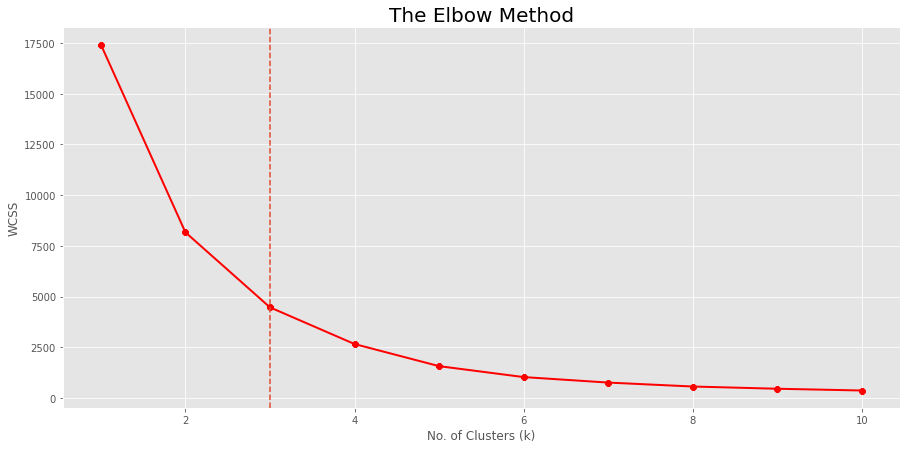

In [219]:
fig, ax = plt.subplots(figsize=(15,7))
ax = plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.axvline(x=3, ls='--')
plt.ylabel('WCSS')
plt.xlabel('No. of Clusters (k)')
plt.title('The Elbow Method', fontsize = 20)
plt.show()


It is clear, that the optimal number of clusters for our data are 3, as the slope of the curve is not steep enough after it. When we observe this curve, we see that last elbow comes at k = 3, it would be difficult to visualize the elbow if we choose the higher range.

### Clustering
Now we will build the model for creating clusters from the dataset. We will use n_clusters = 3 i.e. 3 clusters as we have determined by the elbow method, which would be optimal for our dataset.

Our data set is for unsupervised learning therefore we will use fit_predict() Suppose we were working with supervised learning data set we would use fit_tranform()

In [220]:
from sklearn.cluster import KMeans

kms = KMeans(n_clusters=3, init='k-means++')
kms.fit(data.iloc[:,2:])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Now that we have the clusters created, we will enter them into a different column

In [221]:
clusters = data.copy()
clusters['Cluster_Prediction'] = kms.fit_predict(data.iloc[:,2:])

In [223]:
clusters.head(60)

npi  ...  Cluster_Prediction
nppes_provider_city nppes_provider_state nppes_provider_zip5            ...                    
Agawam              MA                   1001.0              -0.213542  ...                   0
Amherst             MA                   1002.0               0.081260  ...                   0
Barre               MA                   1005.0              -0.299129  ...                   0
Belchertown         MA                   1007.0              -0.318149  ...                   0
Brimfield           MA                   1010.0              -0.394226  ...                   0
Chicopee            MA                   1013.0              -0.356187  ...                   0
                                         1020.0               0.033711  ...                   0
                                         1022.0              -0.422755  ...                   0
Easthampton         MA                   1027.0              -0.251580  ...                   0
East Longmeadow     MA                   1028.0              -0.004328  ...                   0
Feeding Hills       MA                   1030.0              -0.384717  ...                   0
Hadley              MA                   1035.0              -0.289619  ...                   0
Hampden             MA                   1036.0              -0.422755  ...                   0
Hatfield            MA                   1038.0              -0.413246  ...                   0
Haydenville         MA                   1039.0              -0.422755  ...                   0
Holyoke             MA                   1040.0               0.556746  ...                   0
Huntington          MA                   1050.0              -0.356187  ...                   0
Leeds               MA                   1053.0              -0.318149  ...                   0
Leverett            MA                   1054.0              -0.422755  ...                   0
Ludlow              MA                   1056.0              -0.204032  ...                   0
Monson              MA                   1057.0              -0.394226  ...                   0
Northampton         MA                   1060.0               0.889587  ...                   0
Florence            MA                   1062.0               0.100279  ...                   0
Palmer              MA                   1069.0              -0.080405  ...                   0
Southampton         MA                   1073.0              -0.375207  ...                   0
South Hadley        MA                   1075.0              -0.251580  ...                   0
Southwick           MA                   1077.0              -0.356187  ...                   0
Three Rivers        MA                   1080.0              -0.413246  ...                   0
Ware                MA                   1082.0              -0.118444  ...                   0
Westfield           MA                   1085.0               0.242925  ...                   0
West Hatfield       MA                   1088.0              -0.327658  ...                   0
West Springfield    MA                   1089.0               0.214396  ...                   0
Wilbraham           MA                   1095.0              -0.308639  ...                   0
Worthington         MA                   1098.0              -0.346678  ...                   0
Springfield         MA                   1103.0               0.100279  ...                   0
                                         1104.0               0.984684  ...                   0
                                         1105.0              -0.365697  ...                   0
Longmeadow          MA                   1106.0              -0.204032  ...                   0
Springfield         MA                   1107.0               1.840559  ...                   0
                                         1108.0              -0.299129  ...                   0
                                   


We can also get the centroids of the clusters by the cluster_centers_ attribute of KMeans algorithm.

In [224]:
kms.cluster_centers_

array([[-0.1920151 ],
       [ 2.25993041],
       [11.29691244]])

In [225]:
!pip install geopandas

Now we have all the data we need, we just need to plot the data. We will plot the data using scatterplot which will allow us to observe different clusters in different colours.

In [226]:
import matplotlib.pyplot as plt
import geopandas

In [227]:
zip = geopandas.read_file("/content/drive/My Drive/Data Science/cb_2018_us_zcta510_500k.zip")
type(zip)

geopandas.geodataframe.GeoDataFrame

In [228]:
zip.head()

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry
0,36083,8600000US36083,36083,659750662,5522919,"MULTIPOLYGON (((-85.63225 32.28098, -85.62439 ..."
1,35441,8600000US35441,35441,172850429,8749105,"MULTIPOLYGON (((-87.83287 32.84437, -87.83184 ..."
2,35051,8600000US35051,35051,280236456,5427285,"POLYGON ((-86.74384 33.25002, -86.73802 33.251..."
3,35121,8600000US35121,35121,372736030,5349303,"POLYGON ((-86.58527 33.94743, -86.58033 33.948..."
4,35058,8600000US35058,35058,178039922,3109259,"MULTIPOLYGON (((-86.87884 34.21196, -86.87649 ..."


In [229]:
zip.rename(columns={'ZCTA5CE10': 'nppes_provider_zip5'}, inplace=True)
zip.head()

,nppes_provider_zip5,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry
0,36083,8600000US36083,36083,659750662,5522919,"MULTIPOLYGON (((-85.63225 32.28098, -85.62439 ..."
1,35441,8600000US35441,35441,172850429,8749105,"MULTIPOLYGON (((-87.83287 32.84437, -87.83184 ..."
2,35051,8600000US35051,35051,280236456,5427285,"POLYGON ((-86.74384 33.25002, -86.73802 33.251..."
3,35121,8600000US35121,35121,372736030,5349303,"POLYGON ((-86.58527 33.94743, -86.58033 33.948..."
4,35058,8600000US35058,35058,178039922,3109259,"MULTIPOLYGON (((-86.87884 34.21196, -86.87649 ..."


In [230]:
data.head()

,,,npi,income,population
nppes_provider_city,nppes_provider_state,nppes_provider_zip5,,,
Agawam,MA,1001.0,-0.213542,0.284390,-0.260610
Amherst,MA,1002.0,0.081260,0.058326,0.055380
Barre,MA,1005.0,-0.299129,-0.672945,-0.344968
Belchertown,MA,1007.0,-0.318149,0.093115,-0.316984
Brimfield,MA,1010.0,-0.394226,-0.728490,-0.359741


In [231]:
zip.shape

(33144, 6)

In [232]:
data.shape

(17426, 3)

In [233]:
data=data.sort_values('nppes_provider_zip5')
zip=zip.sort_values('nppes_provider_zip5')

In [234]:
# data.head(3)

In [235]:
zip.head(3)

,nppes_provider_zip5,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry
2641,00601,8600000US00601,00601,166659749,799292,"POLYGON ((-66.83526 18.20998, -66.83287 18.214..."
19801,00602,8600000US00602,00602,79307535,4428429,"POLYGON ((-67.23935 18.37626, -67.23810 18.377..."
21246,00603,8600000US00603,00603,81887185,181411,"POLYGON ((-67.16965 18.47511, -67.16909 18.477..."


In [236]:
# states = geopandas.read_file("/content/drive/My Drive/Data Science/cb_2018_us_state_20m.zip")
# type(states)

In [237]:
states.rename(columns={'STUSPS': 'nppes_provider_state'}, inplace=True)
states = states[~states['nppes_provider_state'].str.contains('AK')]
states = states[~states['nppes_provider_state'].str.contains('HI')]
states = states[~states['nppes_provider_state'].str.contains('PR')]
states = states[~states['nppes_provider_state'].str.contains('RI')]

clusters = clusters[~clusters['nppes_provider_state'].str.contains('AK')]
clusters = clusters[~clusters['nppes_provider_state'].str.contains('HI')]
clusters = clusters[~clusters['nppes_provider_state'].str.contains('PR')]
clusters = clusters[~clusters['nppes_provider_state'].str.contains('RI')]

NameError: ignored

In [ ]:
states.head()

In [ ]:
states.crs

In [ ]:
states = states.to_crs("EPSG:3395")

In [ ]:
# fig = plt.figure(1, figsize=(25,15)) 
# ax = fig.add_subplot()
# states.apply(lambda x: ax.annotate(s=x.NAME, xy=x.geometry.centroid.coords[0], ha='center', fontsize=14),axis=1);
# states.boundary.plot(ax=ax, color='Black', linewidth=.4)
# states.plot(ax=ax, cmap='RdBu', figsize=(12, 12))
# ax.text(-0.05, 0.5, 'https://jcutrer.com', transform=ax.transAxes,
#         fontsize=20, color='gray', alpha=0.5,
#         ha='center', va='center', rotation='90')

In [ ]:
states=states.sort_values('nppes_provider_state')
clusters=clusters.sort_values('nppes_provider_state')

In [ ]:
states.shape

In [ ]:
clusters.shape

In [ ]:
states.head()

In [ ]:
clusters.head()

In [ ]:
merged=pd.merge(states, clusters, on='nppes_provider_state')
merged.head()

In [ ]:
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
merged.apply(lambda x: ax.annotate(s=x.NAME, xy=x.geometry.centroid.coords[0], ha='center', fontsize=14),axis=1)
merged.boundary.plot(ax=ax, color='Black', linewidth=.4)
# merged['Cluster_Prediction'] = clusters['Cluster_Prediction']
merged.plot(column='Cluster_Prediction', ax=ax, legend=True, cmap='RdBu', legend_kwds={'label': "Cluster by State",'orientation': "horizontal"}, figsize=(12, 12))
ax.text(-0.05, 0.5, 'https://jcutrer.com', transform=ax.transAxes,
        fontsize=20, color='gray', alpha=0.5,
        ha='center', va='center', rotation='90')

In [ ]:
# states.head(50)

In [ ]:
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
merged.apply(lambda x: ax.annotate(s=x.NAME, xy=x.geometry.centroid.coords[0], ha='center', fontsize=14),axis=1)
merged.boundary.plot(ax=ax, color='Black', linewidth=.4)
# merged['income'] = clusters['income']
merged.plot(column='income', ax=ax, legend=True, cmap='RdBu',legend_kwds={'label': "Income by State",'orientation': "horizontal"}, figsize=(12, 12))
ax.text(-0.05, 0.5, 'https://jcutrer.com', transform=ax.transAxes,
        fontsize=20, color='gray', alpha=0.5,
        ha='center', va='center', rotation='90')

In [ ]:
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
merged.apply(lambda x: ax.annotate(s=x.NAME, xy=x.geometry.centroid.coords[0], ha='center', fontsize=14),axis=1)
merged.boundary.plot(ax=ax, color='Black', linewidth=.4)
# merged['population'] = clusters['population']
merged.plot(column='population', ax=ax, legend=True, cmap='RdBu', legend_kwds={'label': "Population by State",'orientation': "horizontal"}, figsize=(12, 12))
ax.text(-0.05, 0.5, 'https://jcutrer.com', transform=ax.transAxes,
        fontsize=20, color='gray', alpha=0.5,
        ha='center', va='center', rotation='90')

In [ ]:
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
merged.apply(lambda x: ax.annotate(s=x.NAME, xy=x.geometry.centroid.coords[0], ha='center', fontsize=14),axis=1)
merged.boundary.plot(ax=ax, color='Black', linewidth=.4)
# states['npi'] = clusters['npi']
merged.plot(column='npi', ax=ax, legend=True, cmap='RdBu', legend_kwds={'label': "NPI by State",'orientation': "horizontal"}, figsize=(12, 12))
ax.text(-0.05, 0.5, 'https://jcutrer.com', transform=ax.transAxes,
        fontsize=20, color='gray', alpha=0.5,
        ha='center', va='center', rotation='90')

In [ ]:
# clusters.head(51)